In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
%matplotlib inline

In [2]:
def life_step(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

In [3]:
def sig_func(x,y):
    return(1/(1+np.exp(-(np.dot(x,y)))))


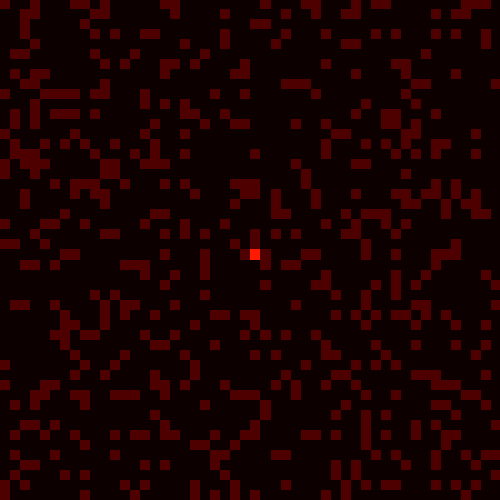
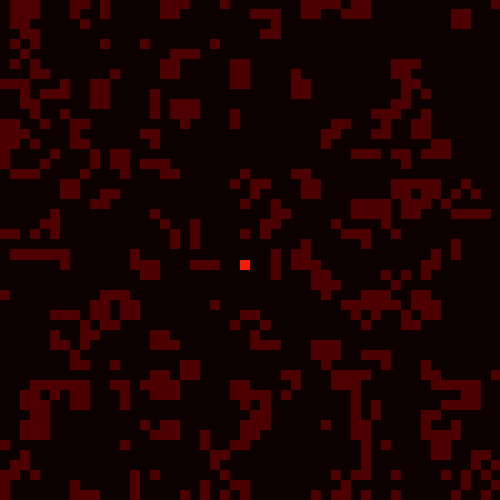
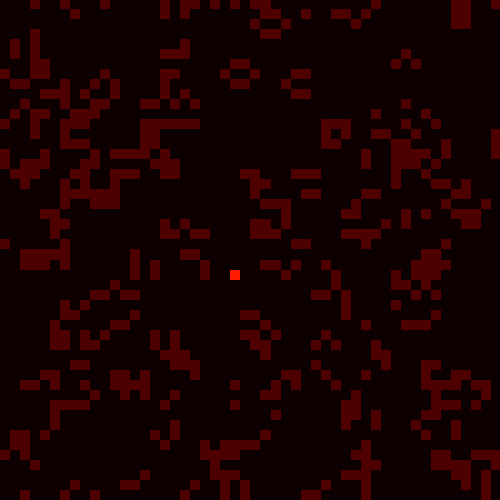
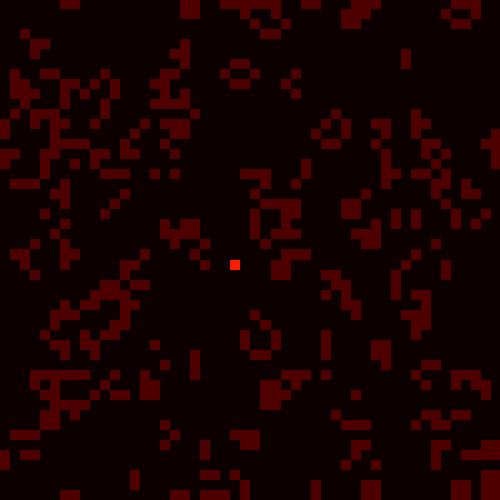
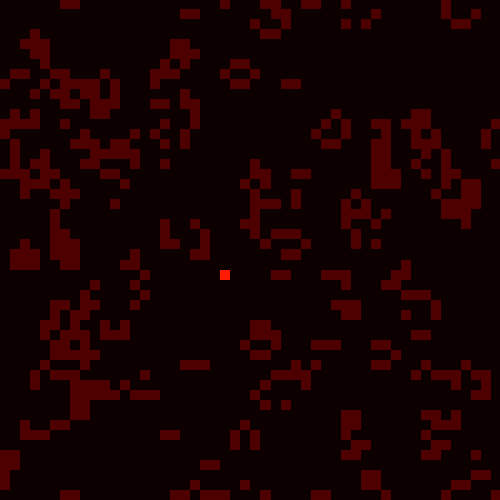
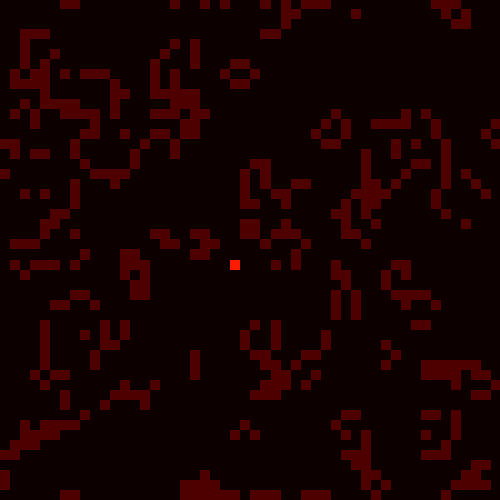
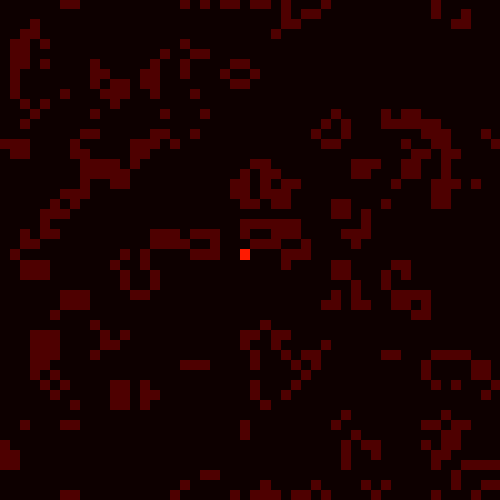
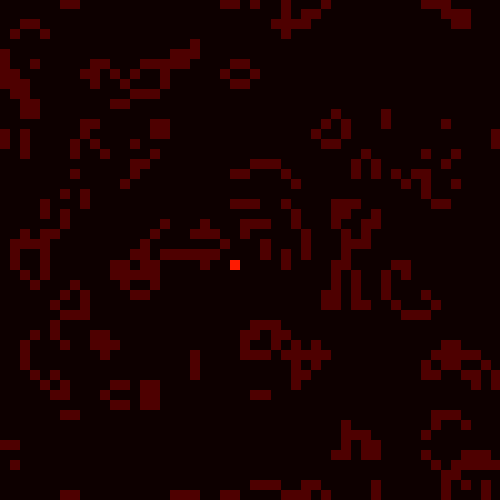
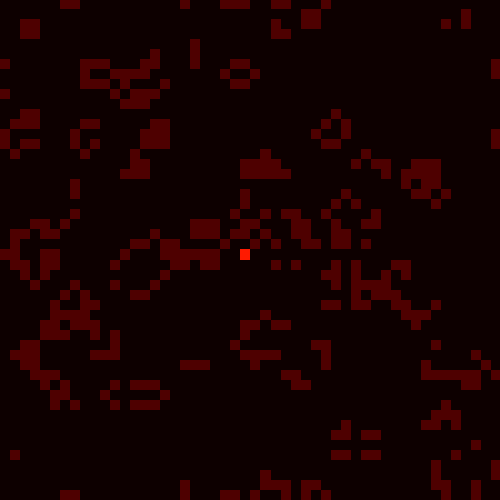
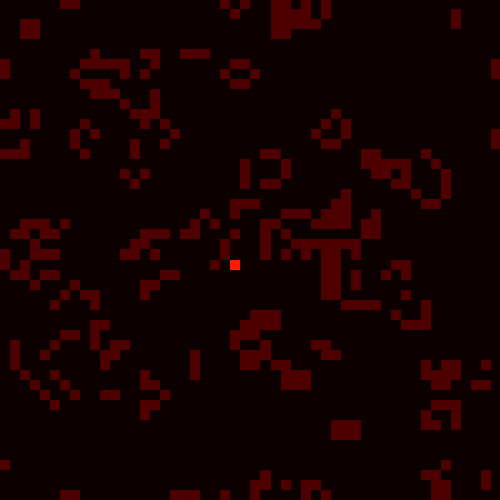
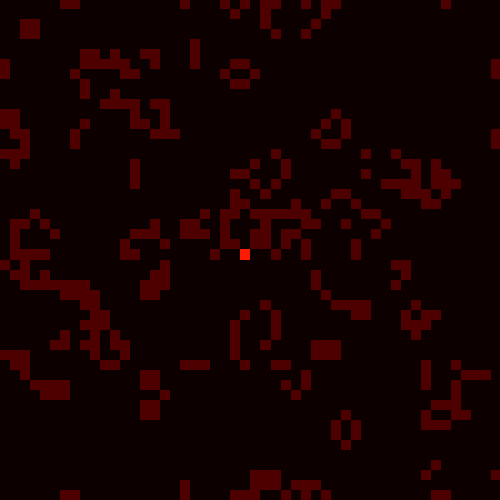
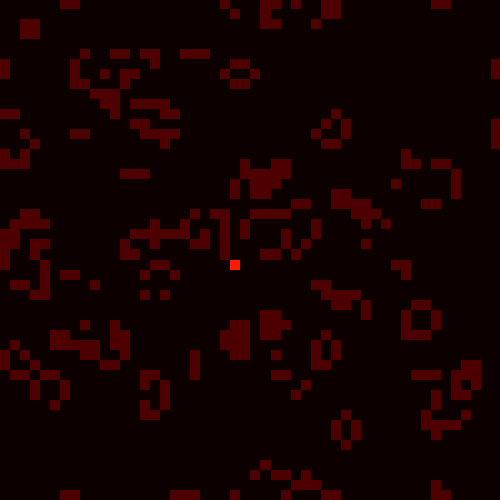
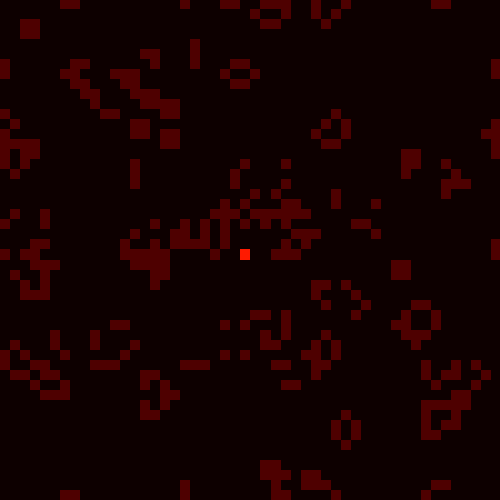
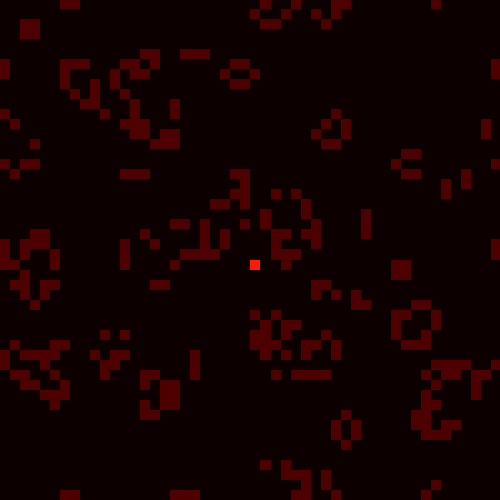
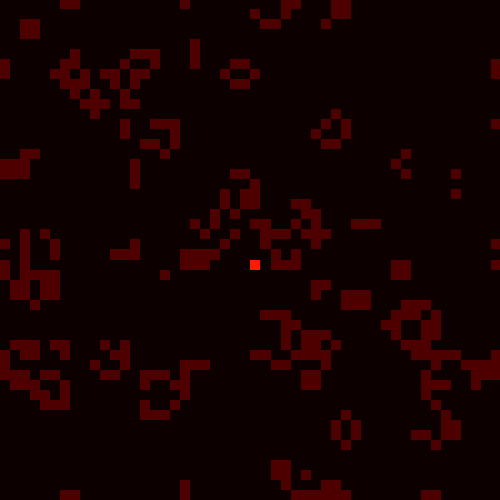
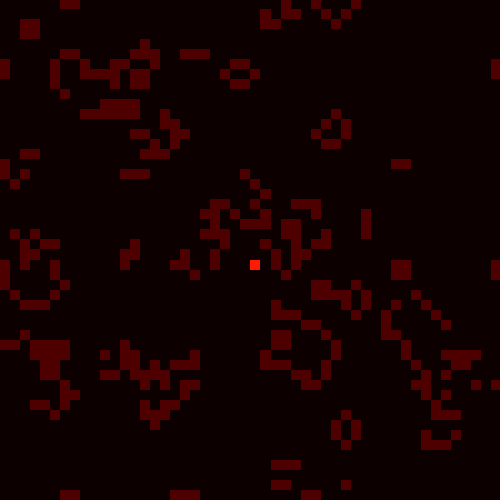
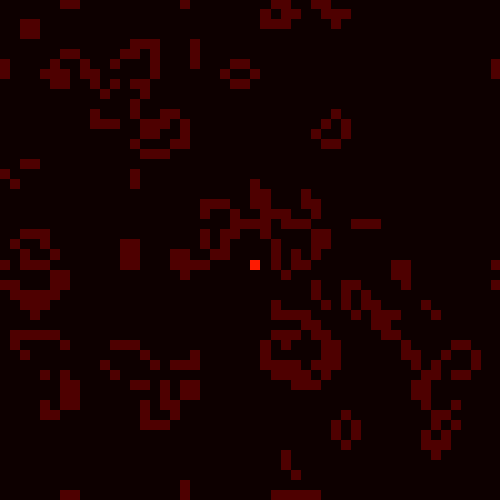
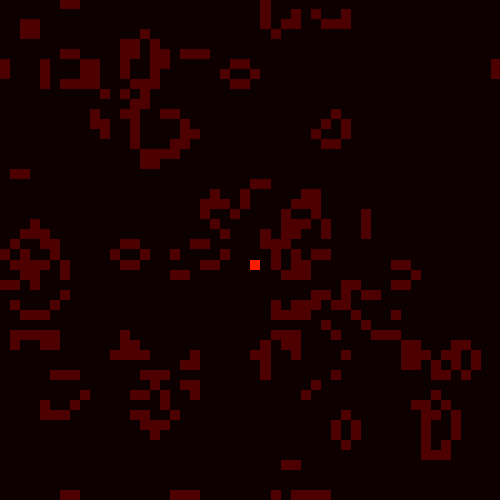
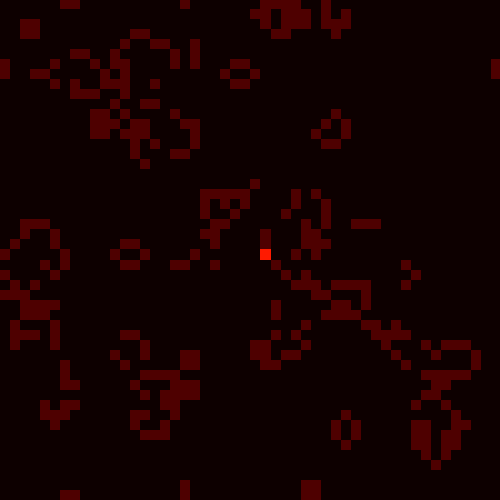
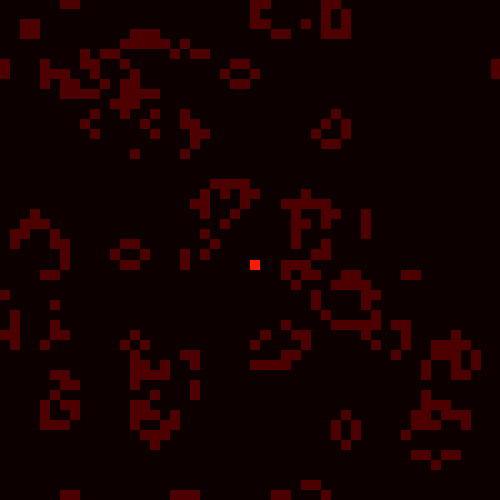
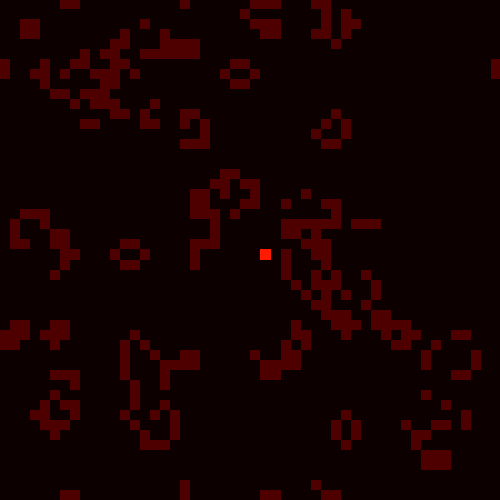
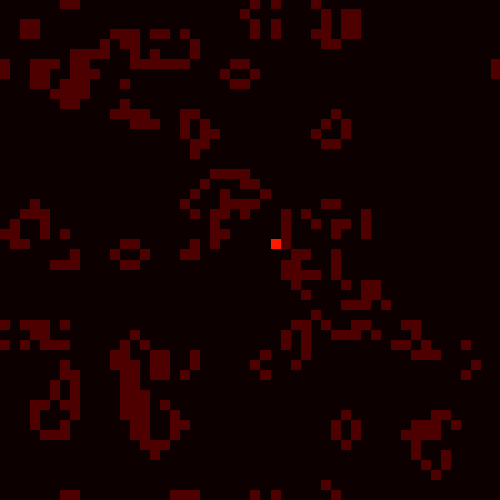
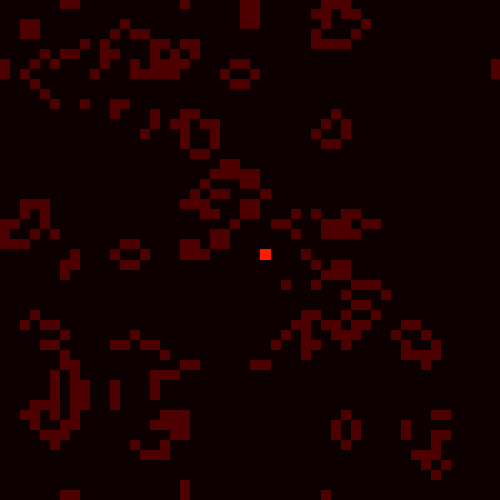
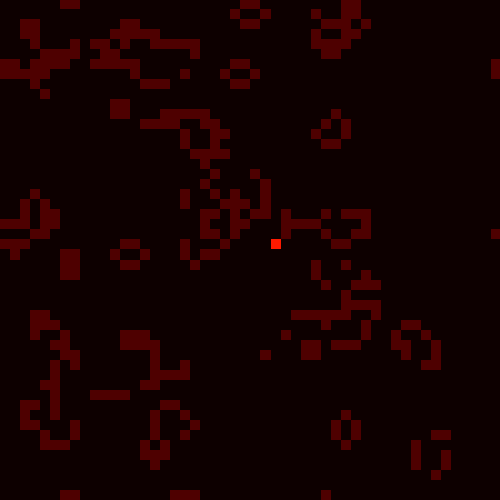
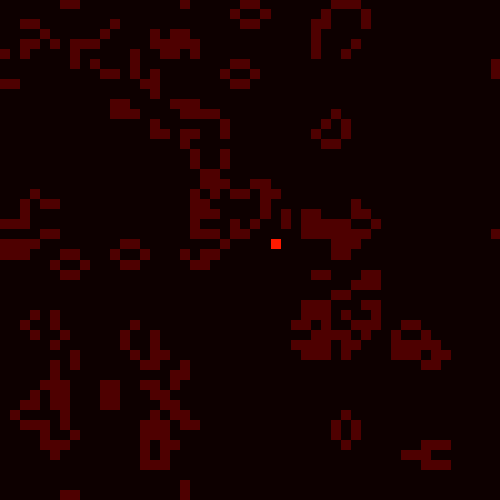
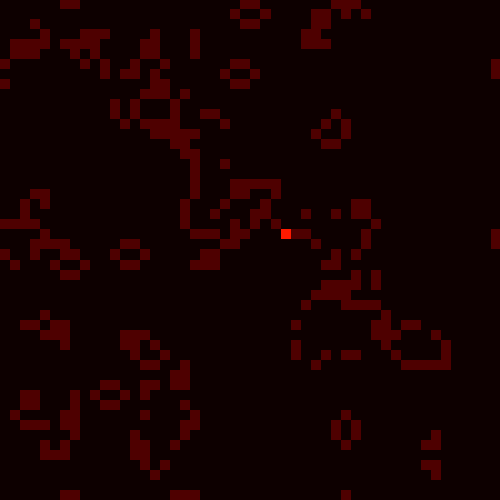
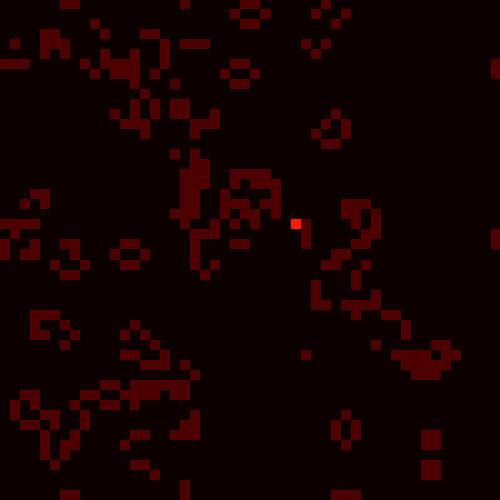
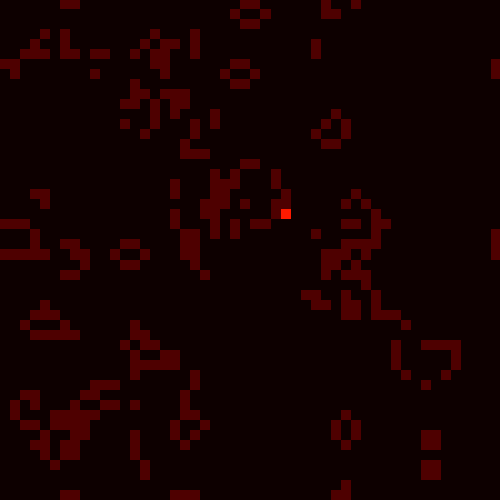
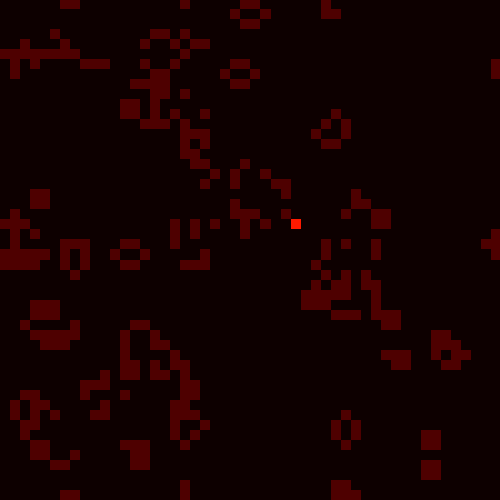
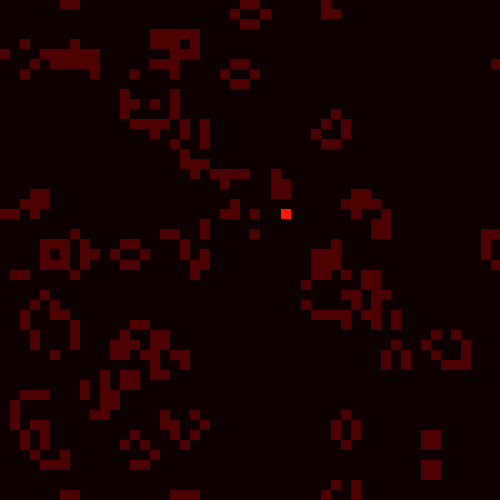
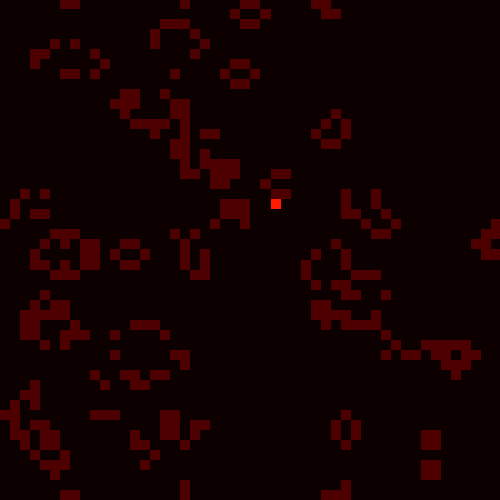
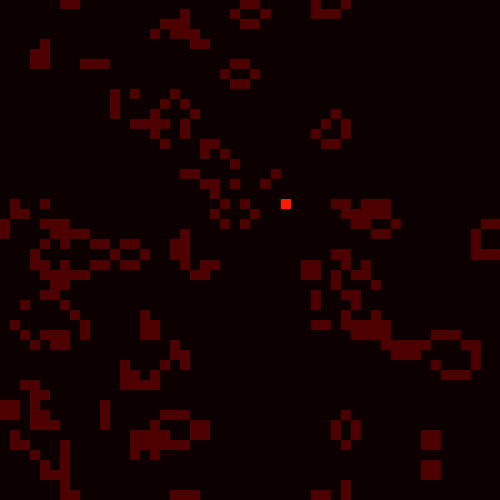
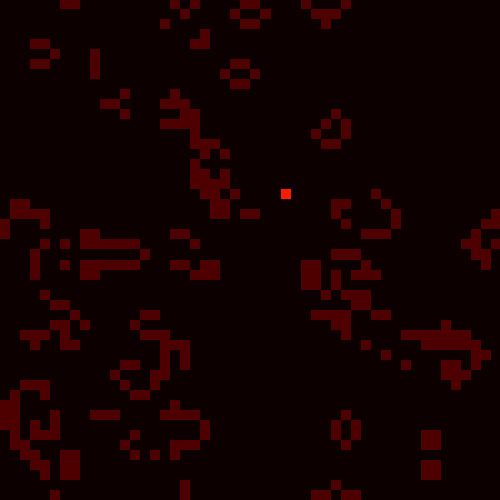
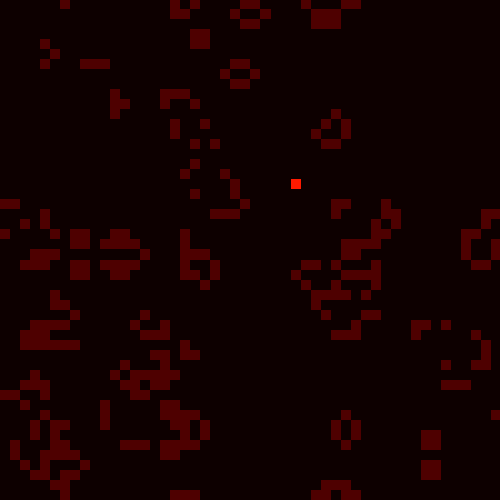
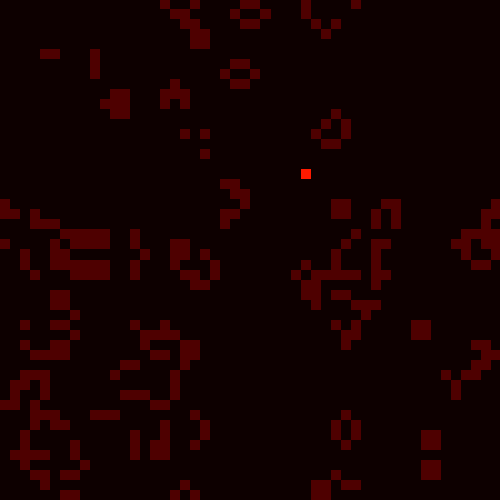
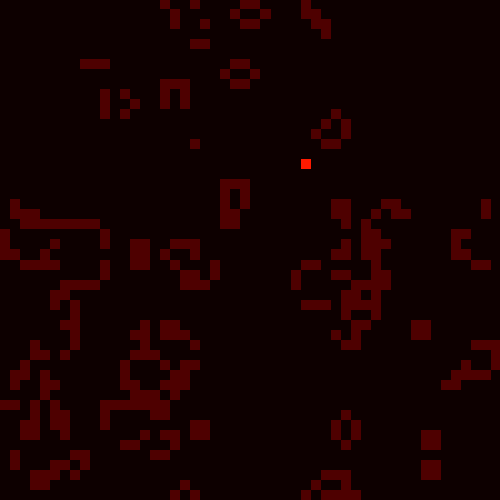
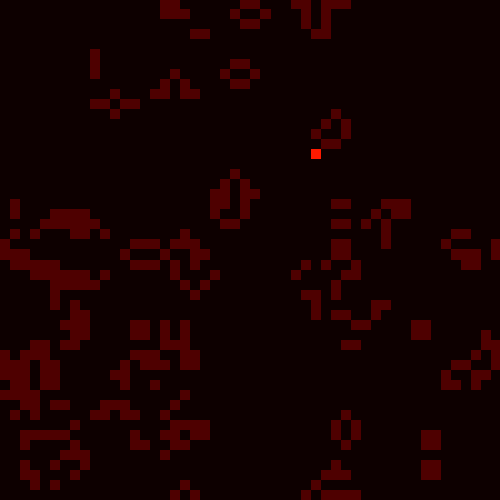
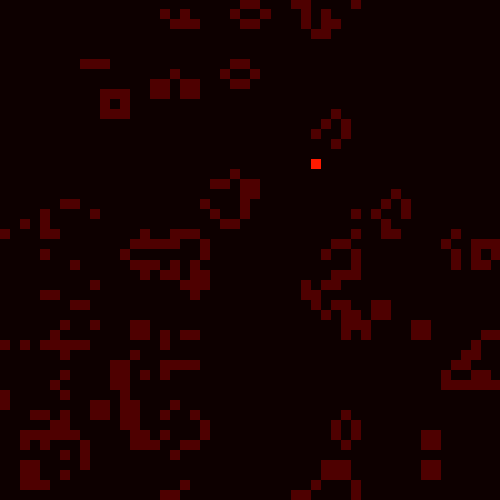
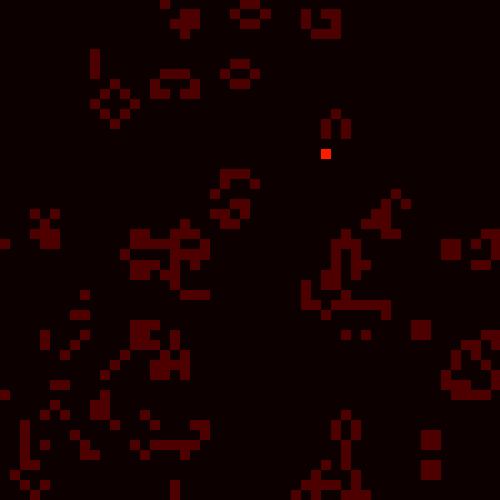
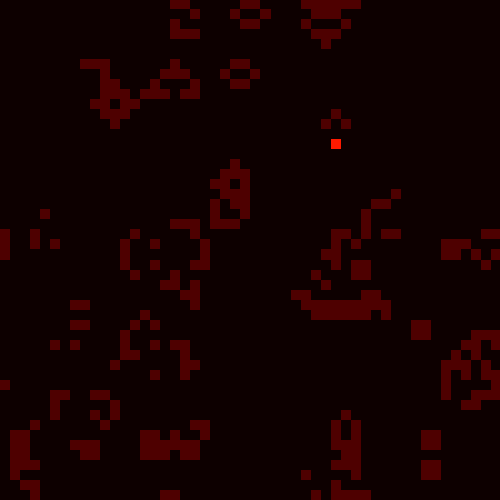
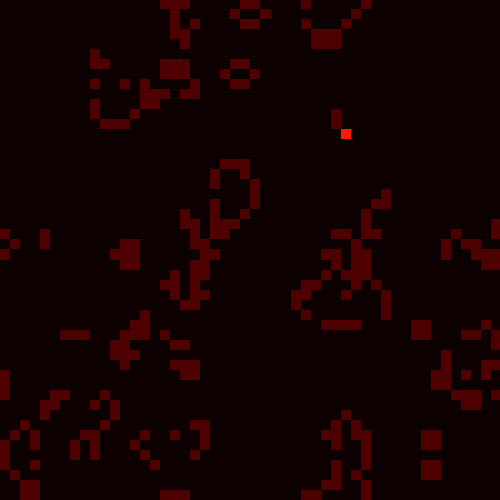
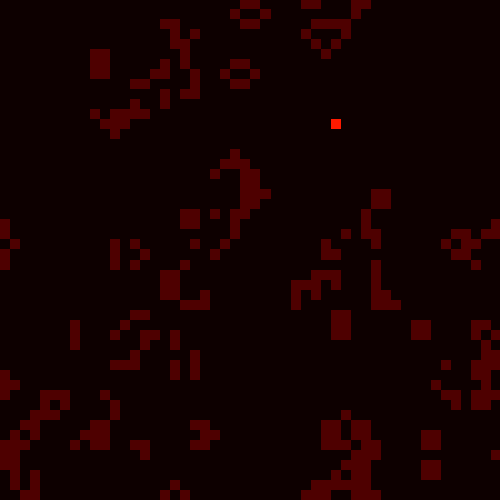
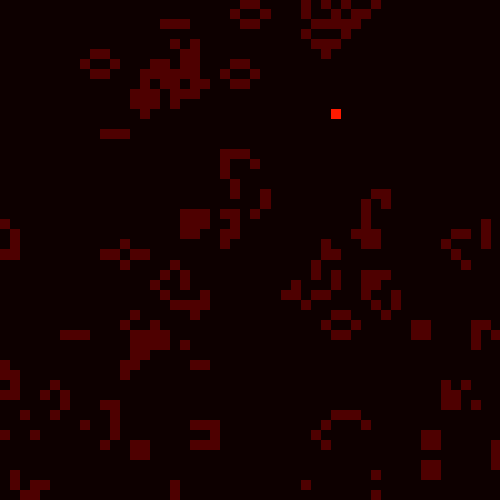
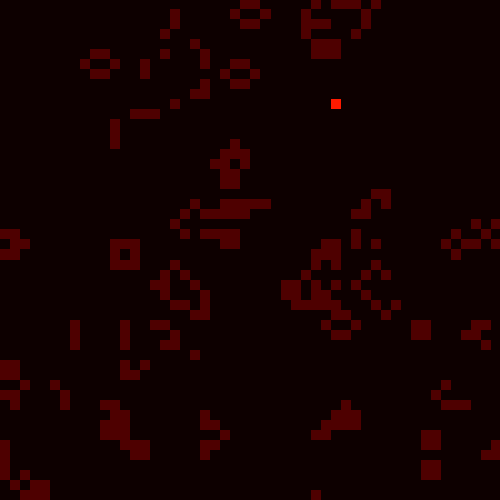
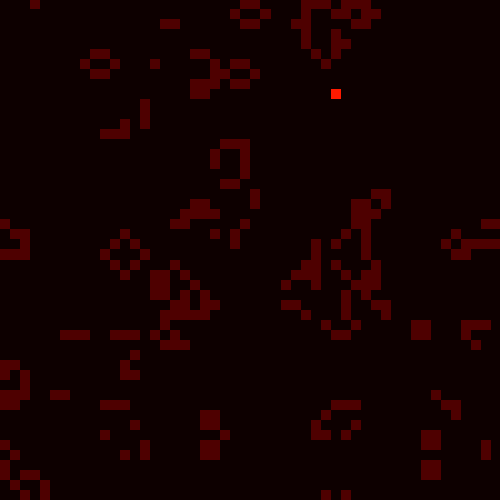
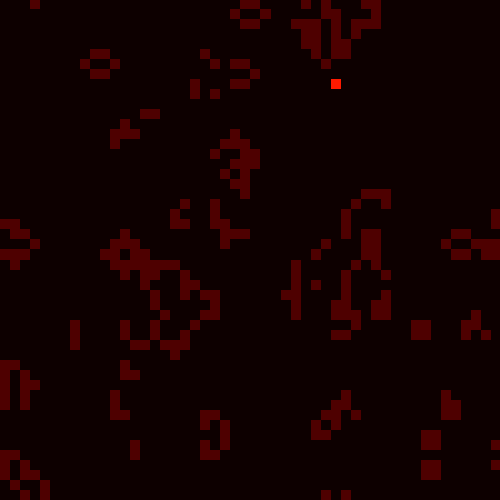
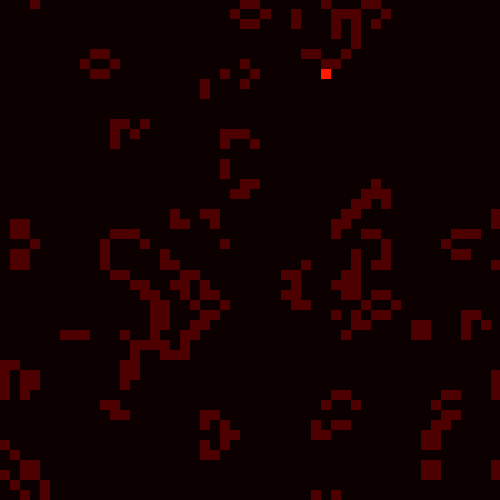
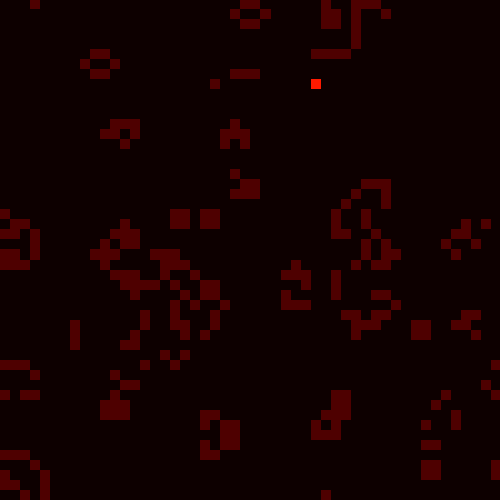
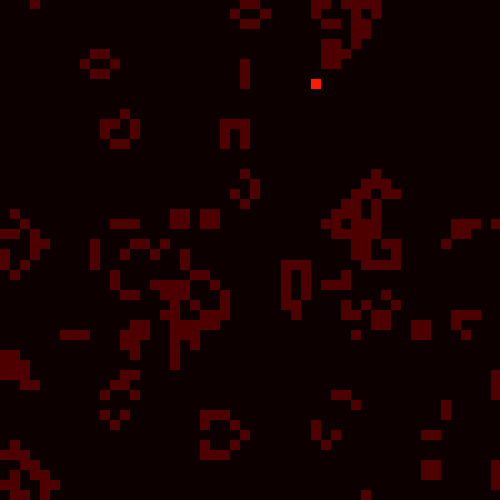
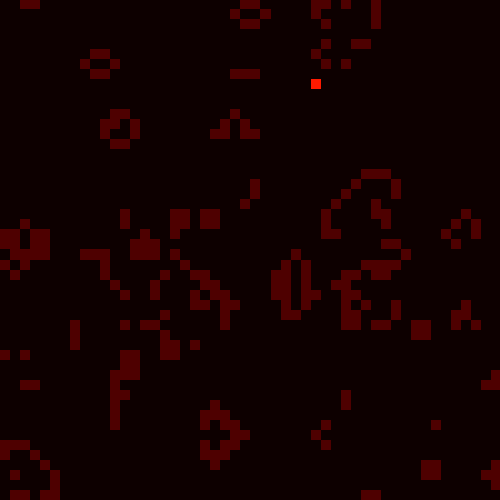
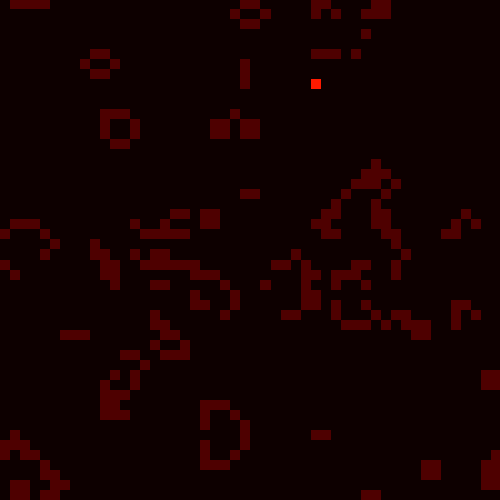
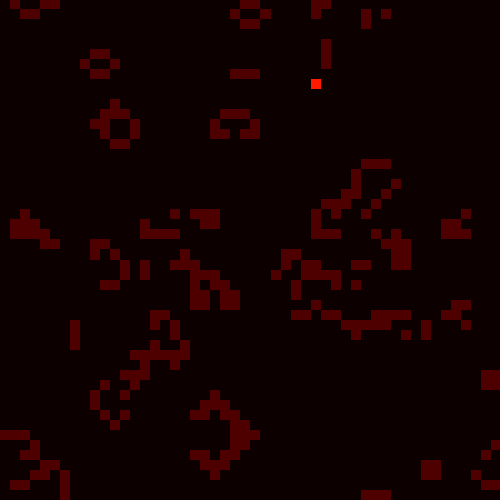
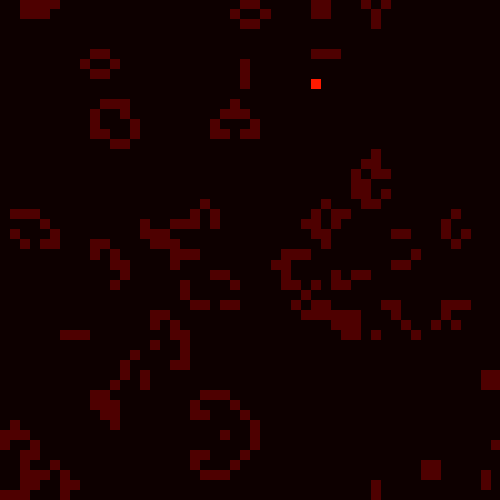
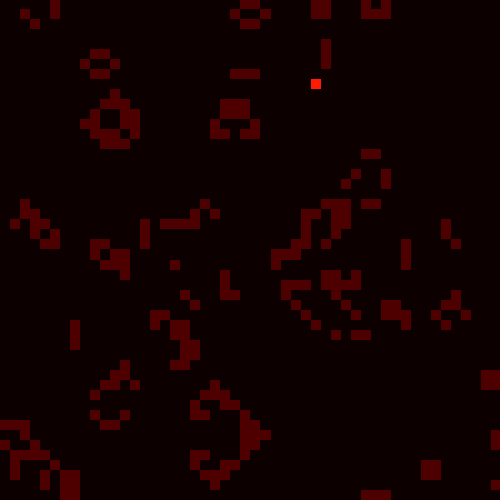
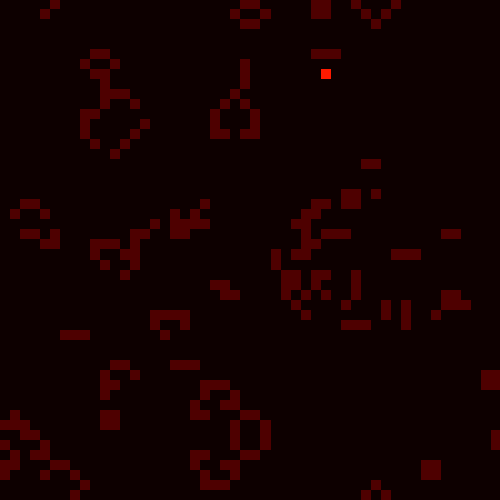
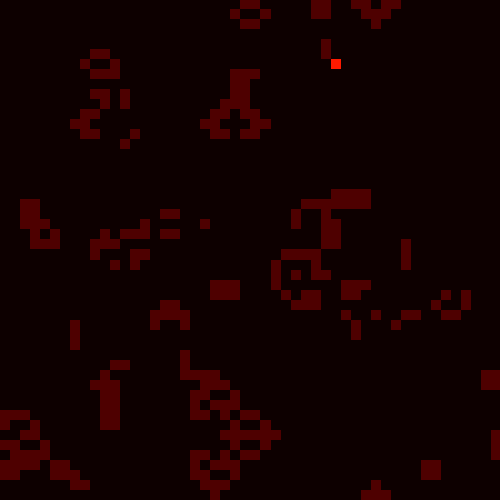
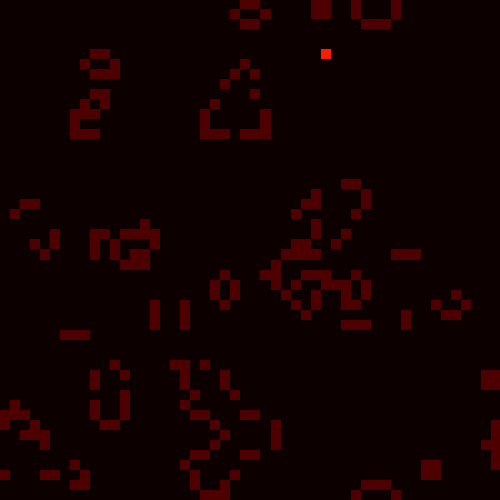
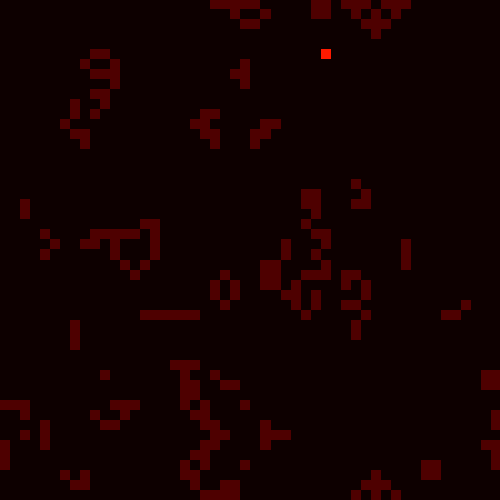
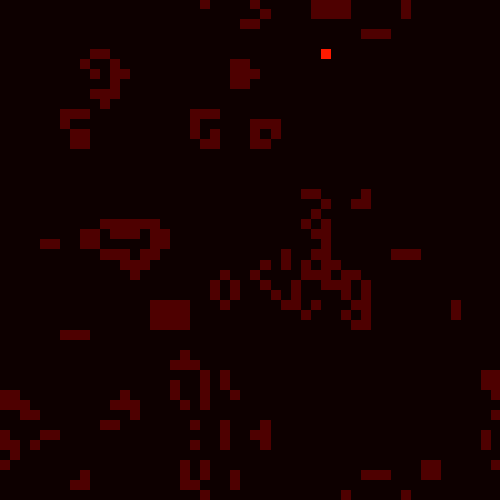
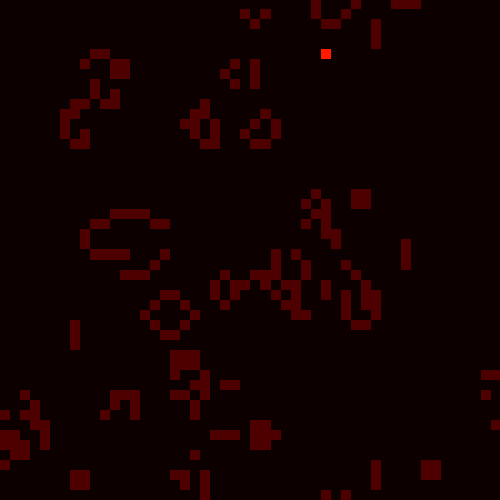
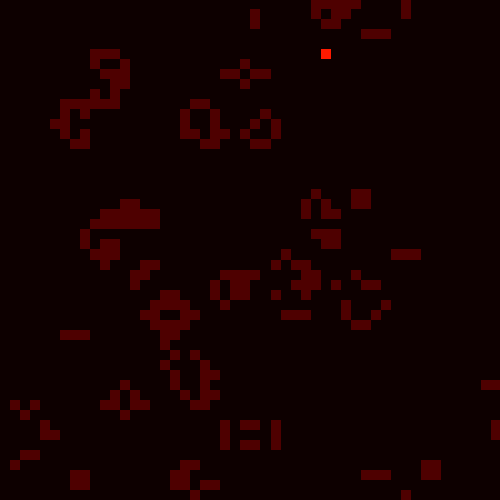
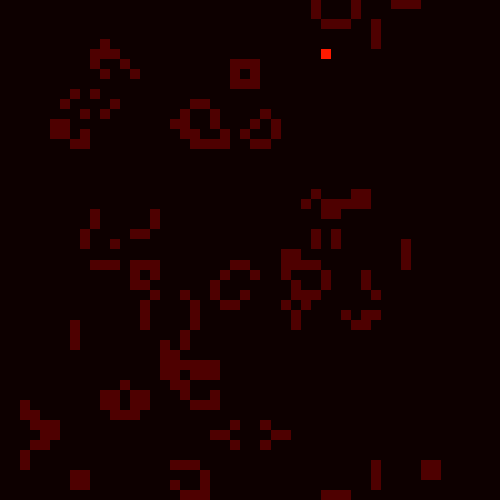
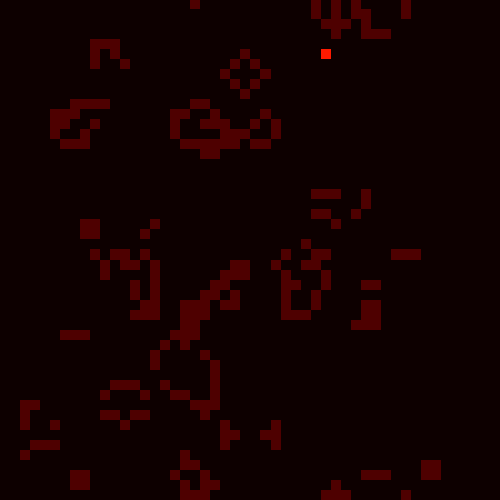
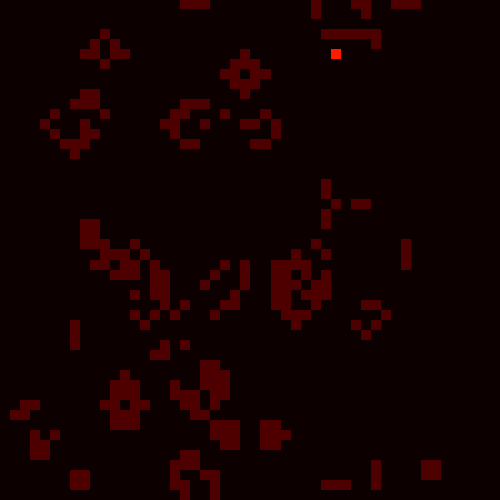
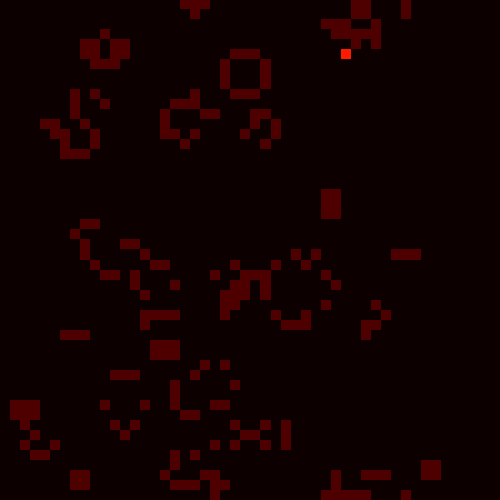
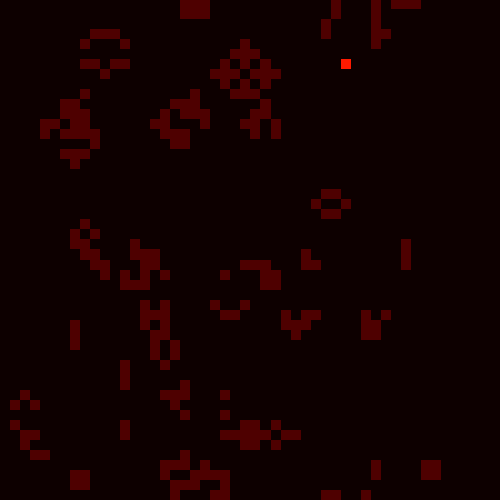
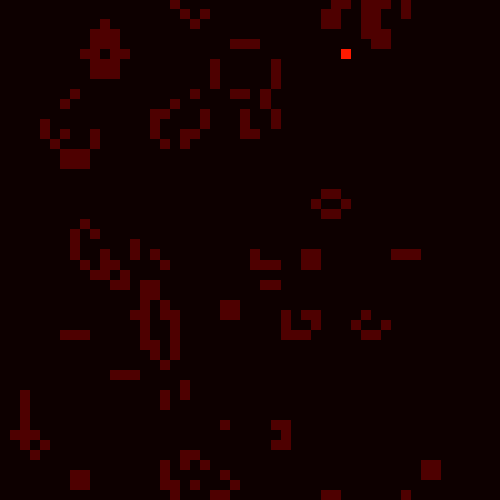
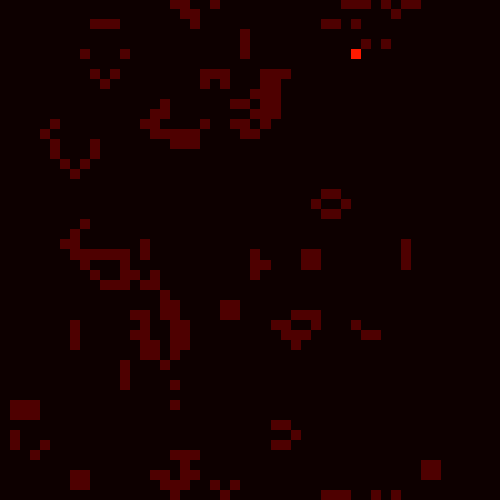
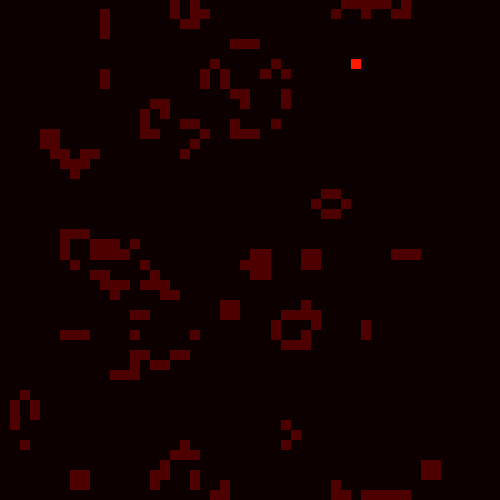
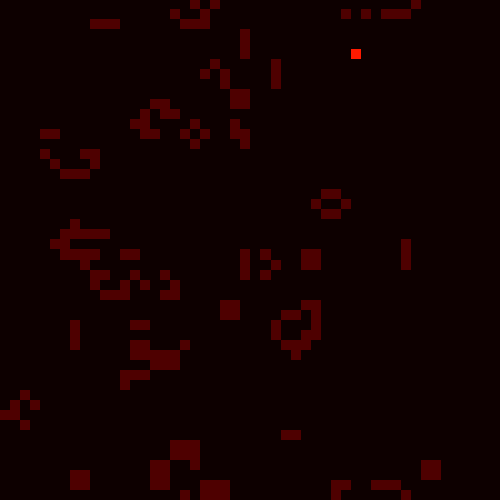
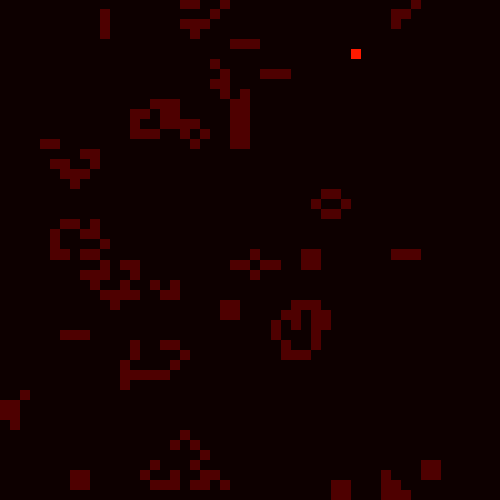
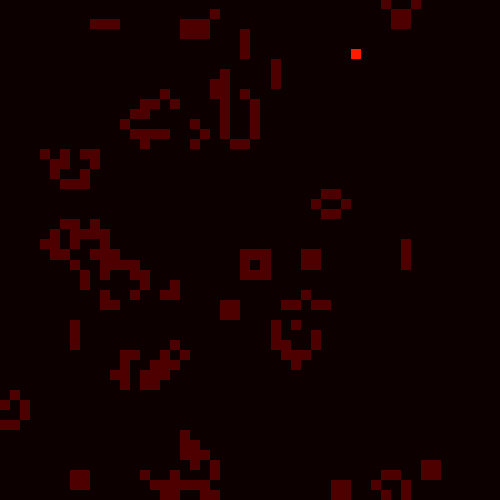
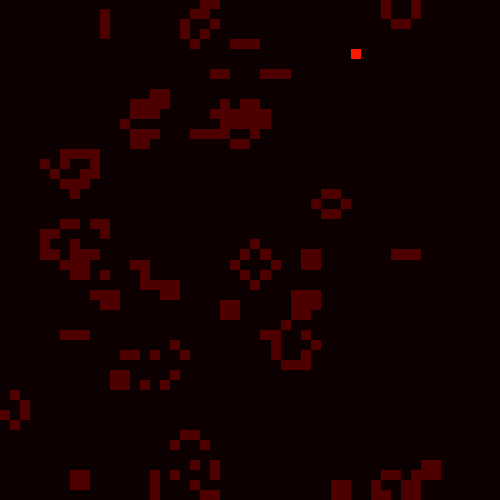
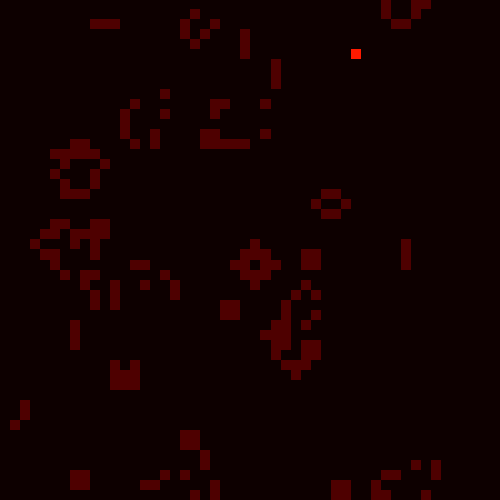
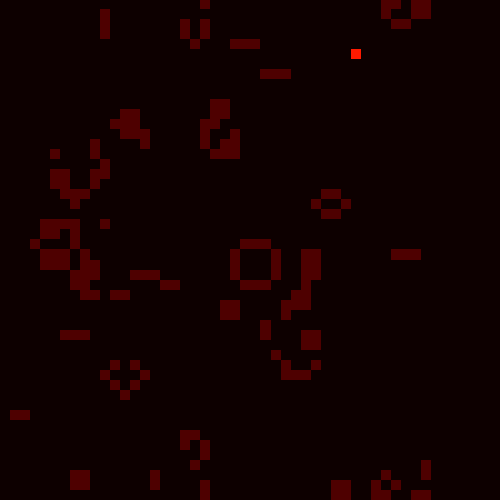
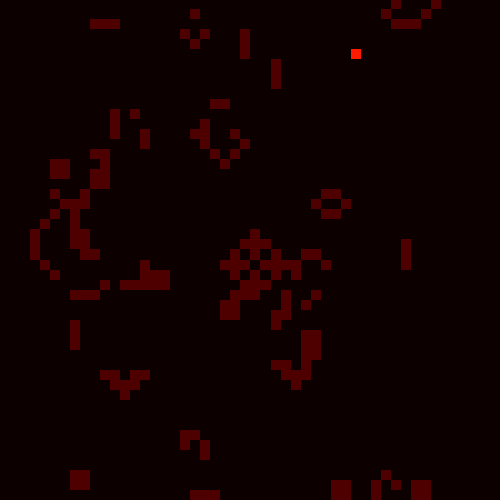
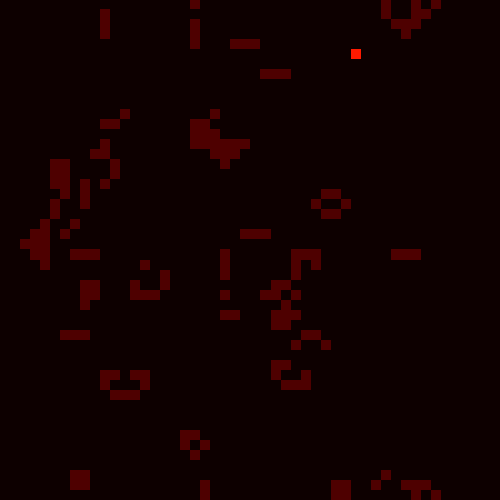
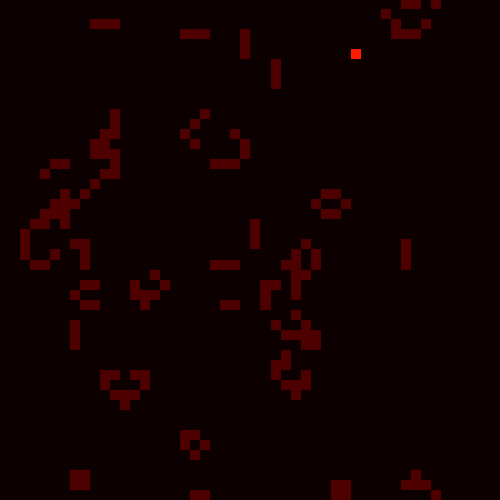
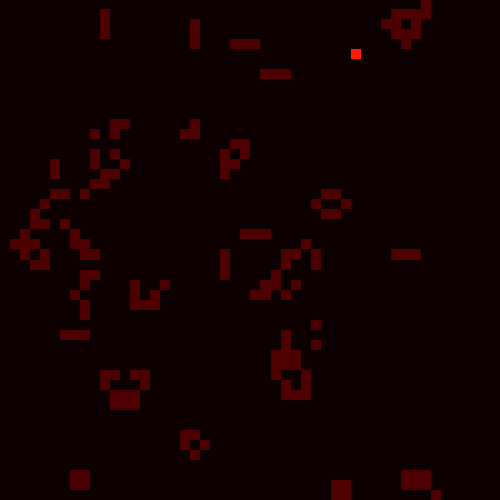
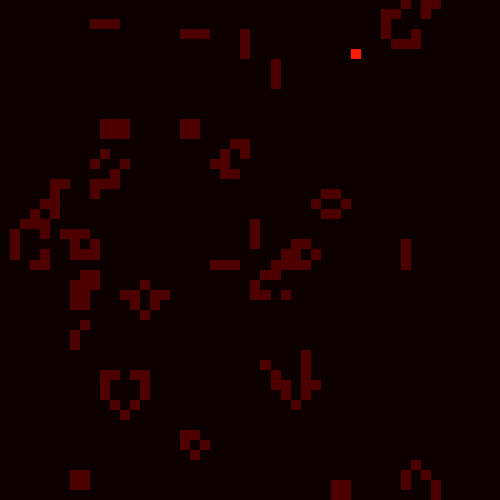
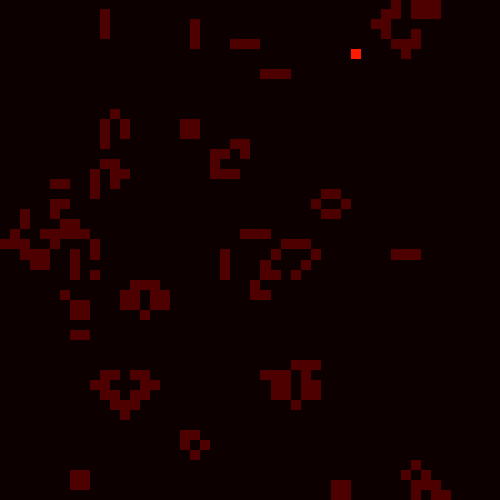
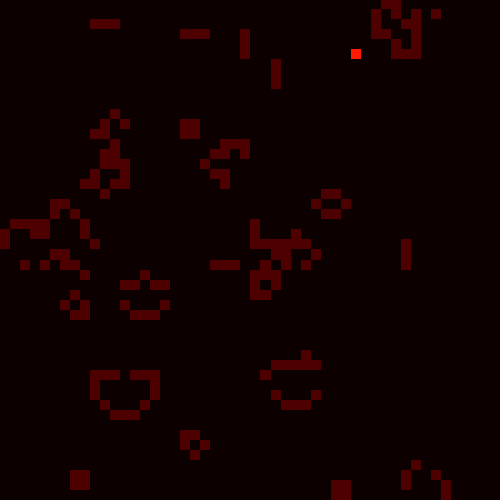
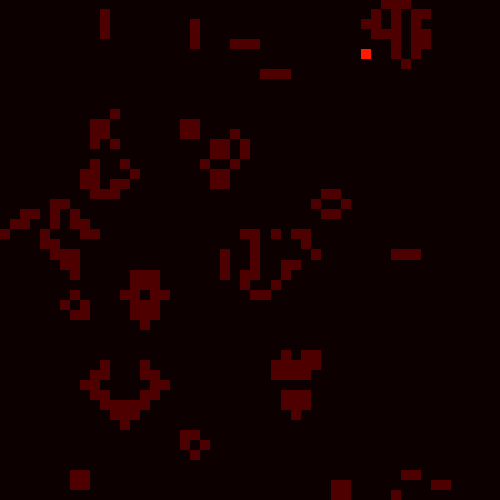
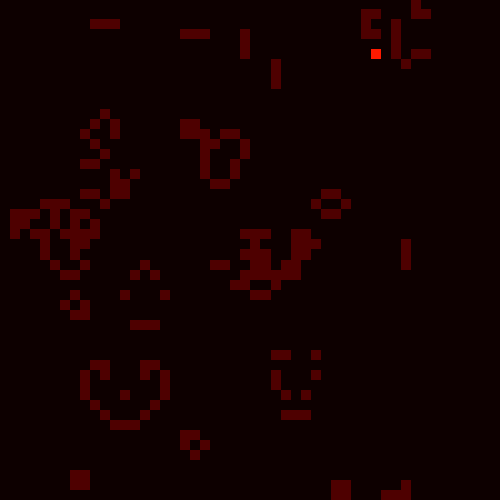
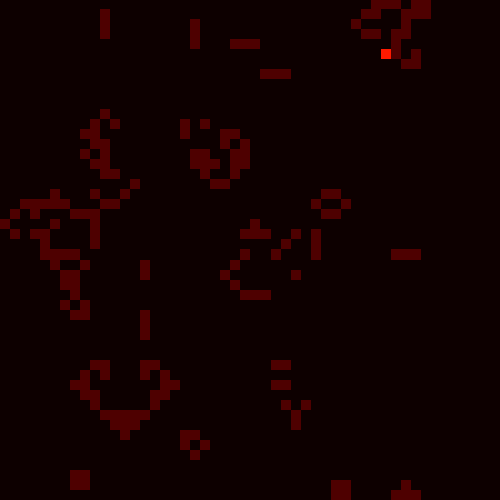
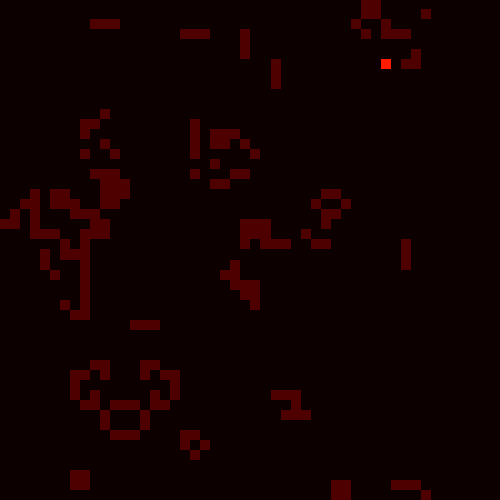
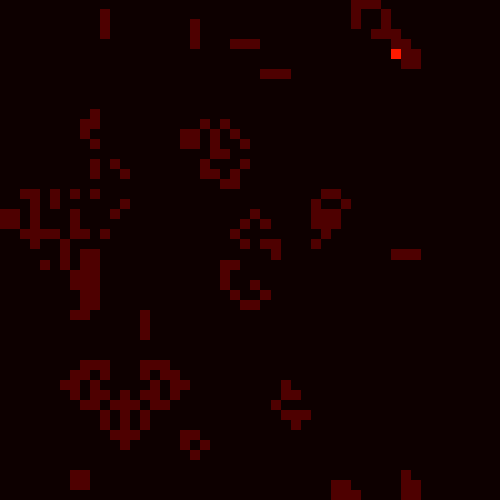
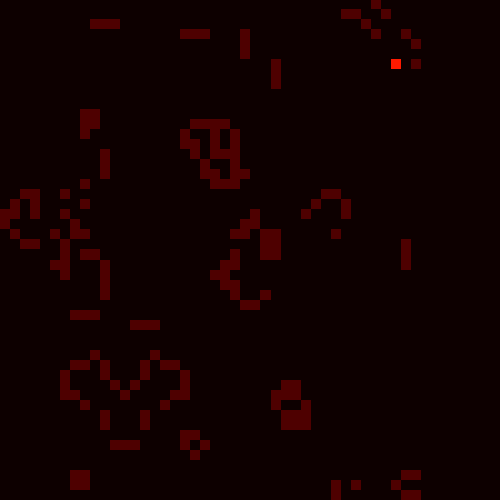
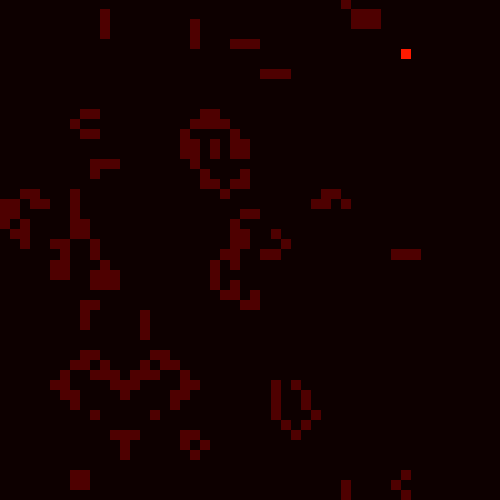
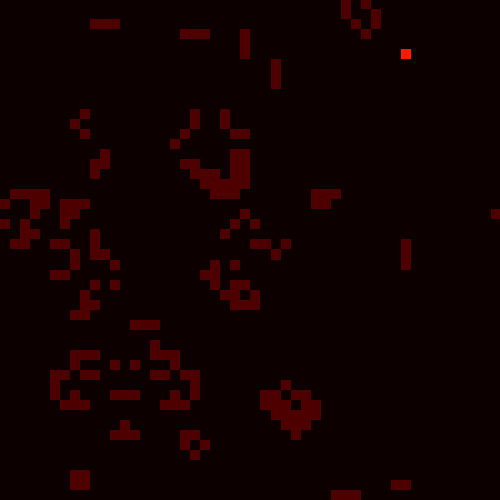
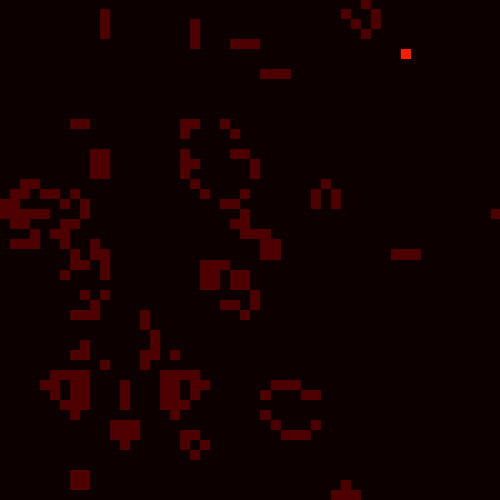
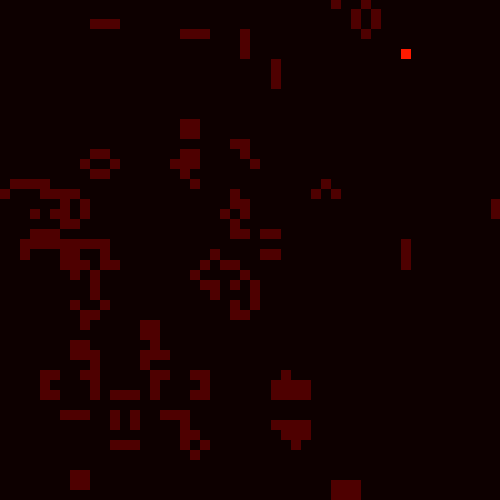
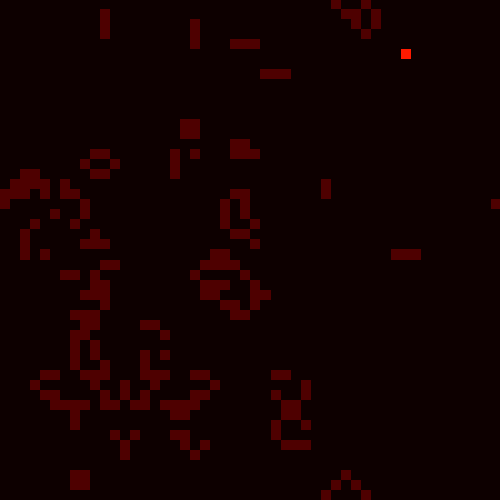
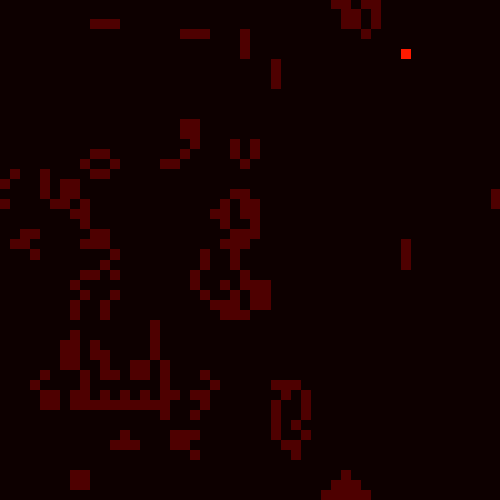
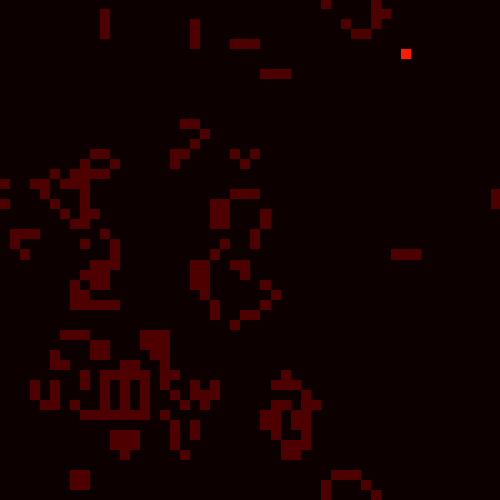
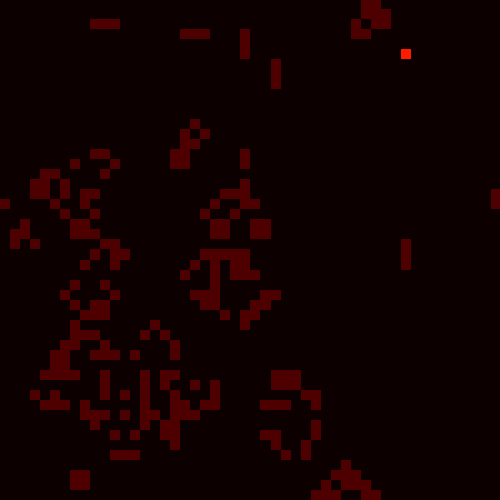
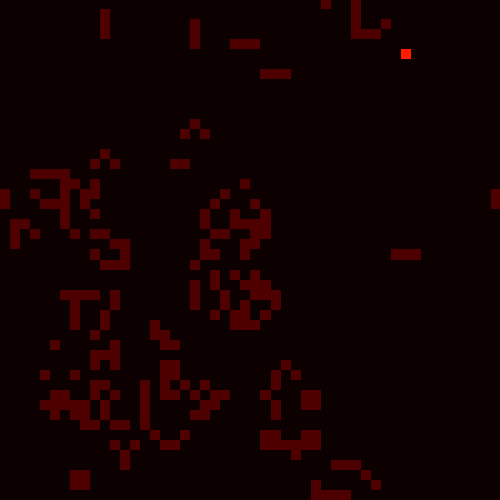
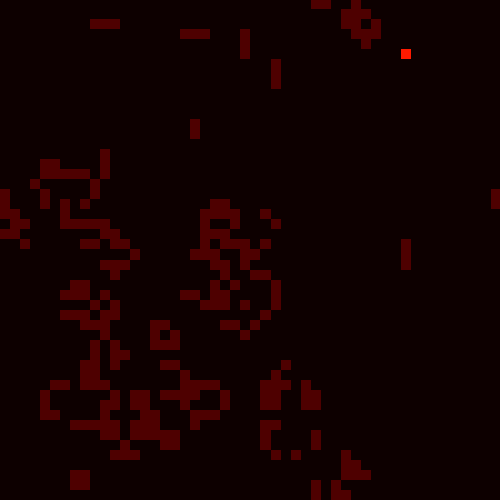
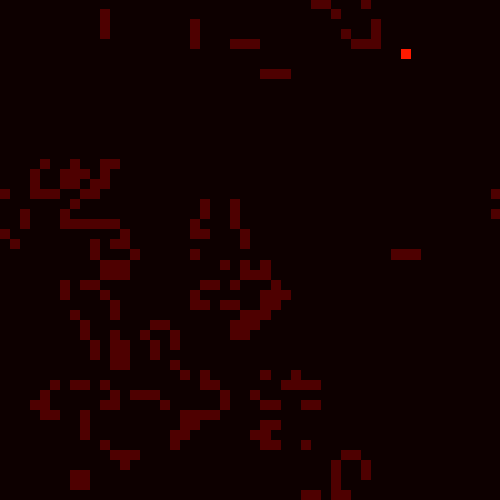
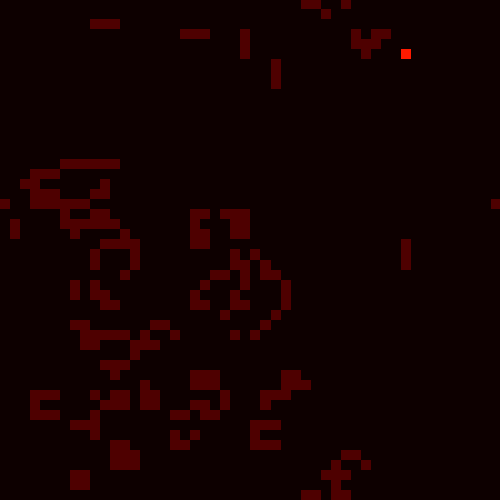

In [4]:
coords = (25,25)
lookr = 2
lookd = (lookr*2+1)

train_in = np.random.randint(0,2,2*lookd*lookd).reshape(2,lookd*lookd)
train_out = np.random.randint(0,2,2*3*3).reshape(2,3*3)
disc_weights = 2*np.random.random((lookd*lookd,3*3))-1
final_weights = 2*np.random.random((lookd*lookd,3*3))-1

def life_animation(X, dpi=80, frames=10, interval=300, mode='loop'):
    
    global coords
    global train_in
    global train_out
    global disc_weights
    global final_weights
                
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(int)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 10. / dpi, X.shape[0] * 10. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap='hot', interpolation='nearest')
    im.set_clim(-0.05, 10)
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)
    
    # animation function.  This is called sequentially
    def animate(i):
        
        global coords
        global train_in
        global train_out
        global disc_weights
        global final_weights
        
        if(animate.X[coords[0],coords[1]] == 0):
            animate.X[coords[0],coords[1]] = 4
        if(animate.X[coords[0],coords[1]] == 1):
            animate.X[coords[0],coords[1]] = 9
        im.set_data(animate.X)
        
        for i in range(1):
            output = sig_func(train_in,disc_weights)
            disc_weights += np.dot(train_in.T,(train_out-output)*output*(1-output))
            
        test_in = animate.X[coords[0]-lookr:coords[0]+lookr+1,coords[1]-lookr:coords[1]+lookr+1].flatten()
        test_out = sig_func(test_in,disc_weights)
        train_in = np.vstack((train_in,test_in))
        
        animate.X = life_step(animate.X)
        outcome = animate.X[coords[0]-1:coords[0]+2,coords[1]-1:coords[1]+2].flatten()
        train_out = np.vstack((train_out,outcome))
        
        d = test_out.argmin() 
        if(d==0):
            coords = (coords[0]-1,coords[1]+1)
        if(d==1):
            coords = (coords[0],coords[1]+1)
        if(d==2):
            coords = (coords[0]+1,coords[1]+1)
        if(d==3):
            coords = (coords[0]-1,coords[1])
        if(d==5):
            coords = (coords[0]+1,coords[1])
        if(d==6):
            coords = (coords[0]-1,coords[1]-1)
        if(d==7):
            coords = (coords[0],coords[1]-1)
        if(d==8):
            coords = (coords[0]+1,coords[1]-1)
        coords = list(np.clip(coords,5,45))
        
        final_weights = np.round(disc_weights)
        
        return (im,)
    
    animate.X = X
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval)
    
    return display_animation(anim, default_mode=mode)

life_animation(np.random.choice([0,0,0,0,1], size=(50,50)), dpi=15, frames=100, interval=50, mode='once')


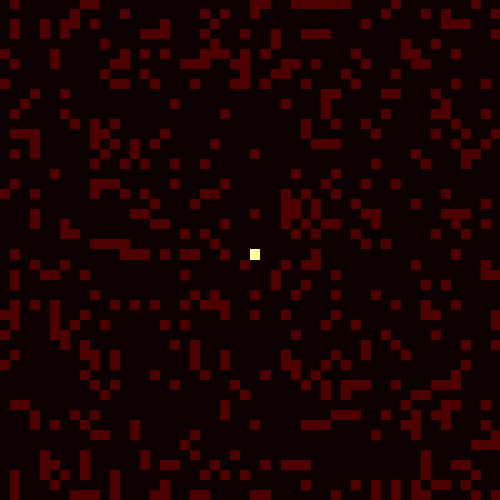
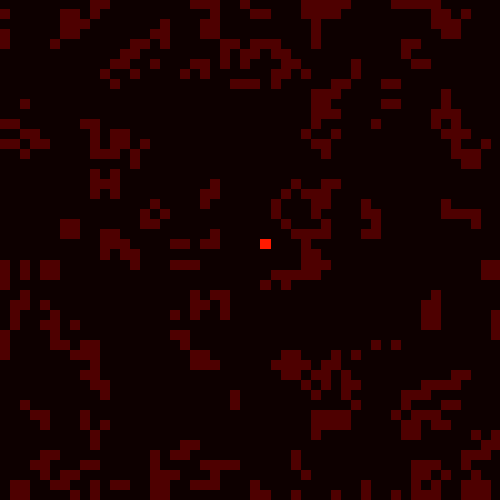
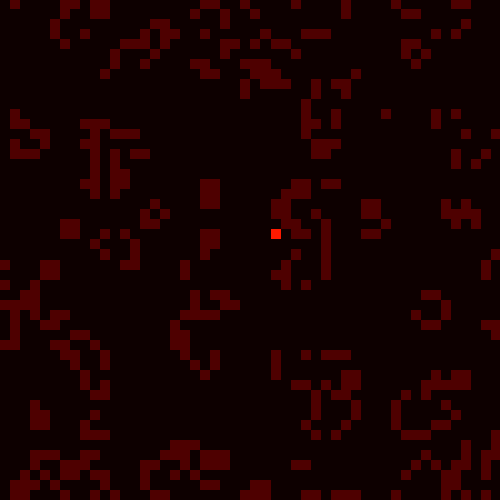
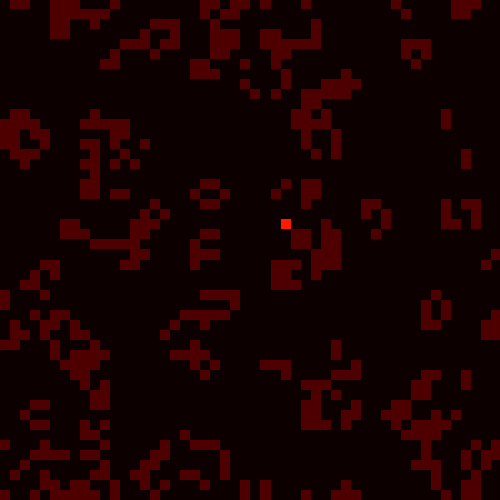
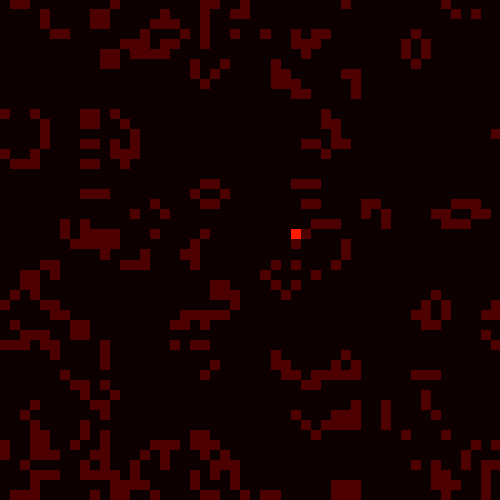
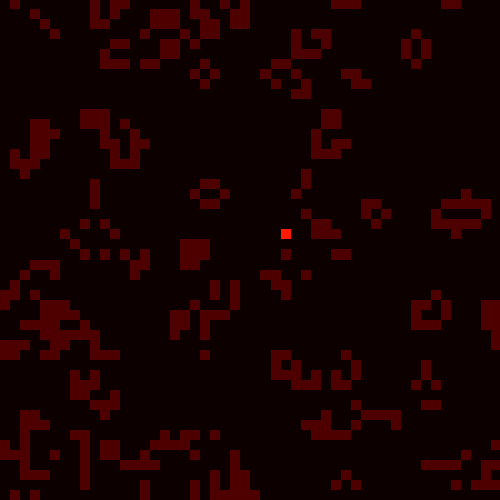
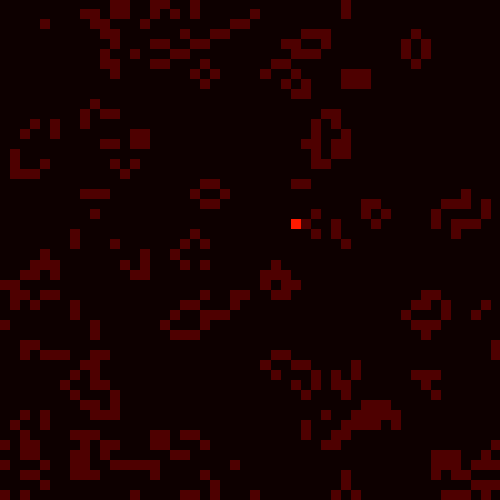
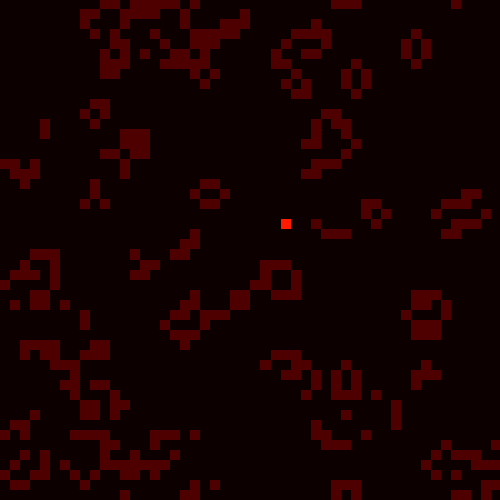
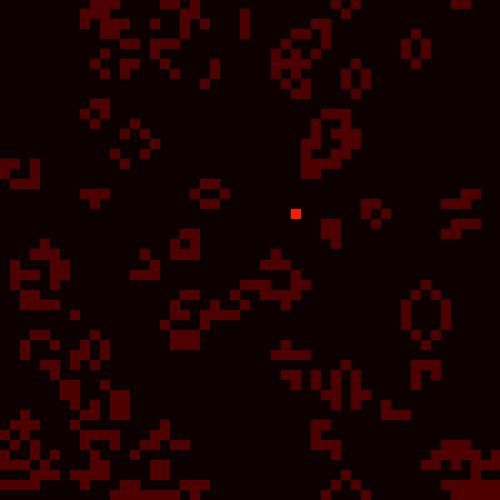
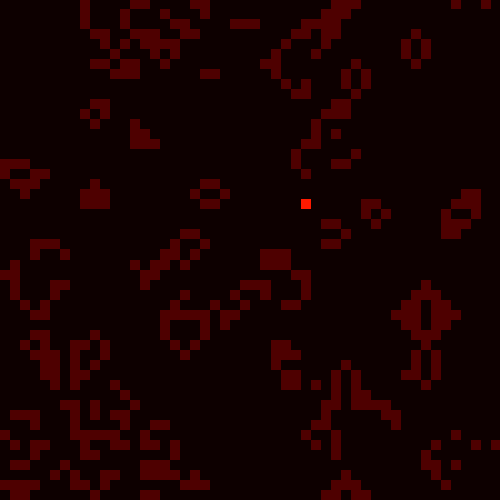
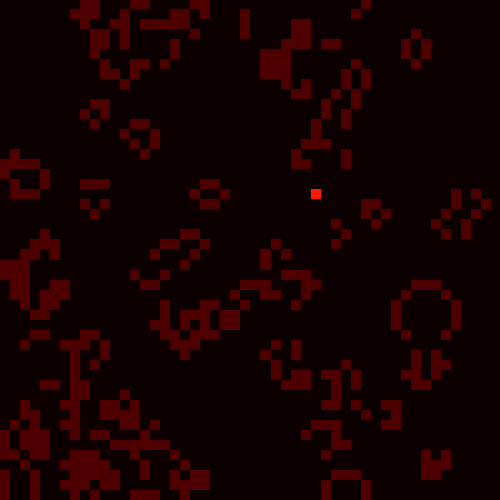
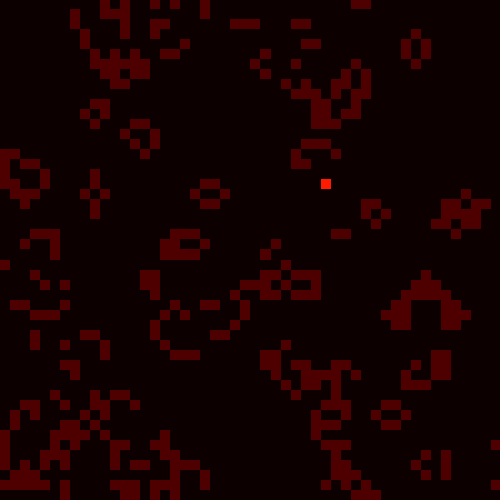
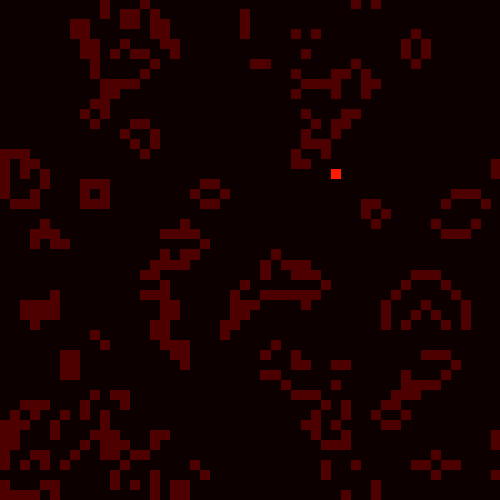
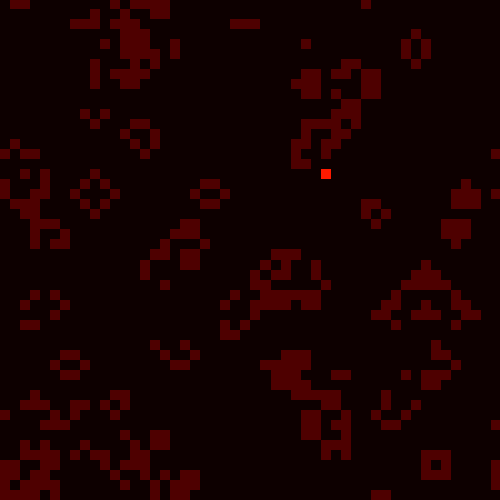
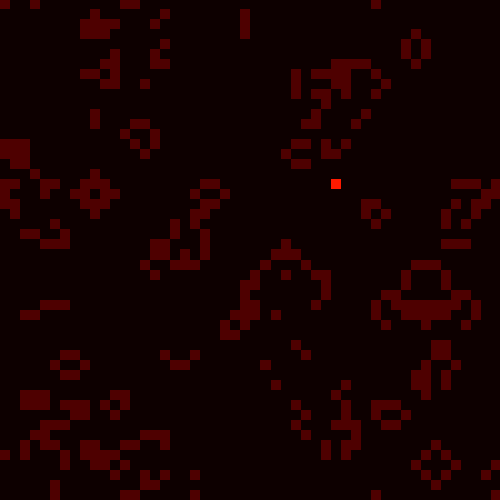
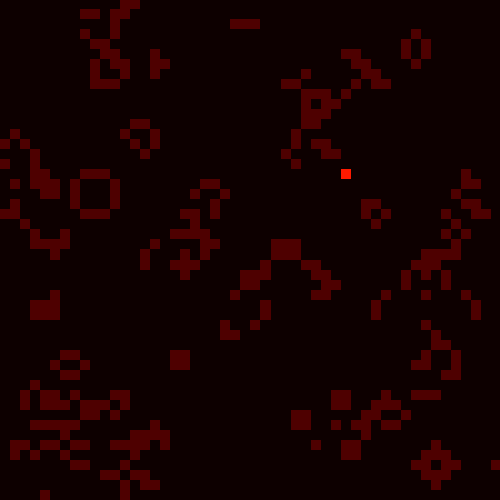
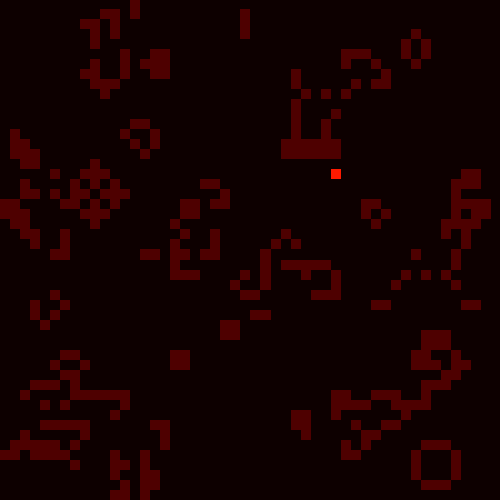
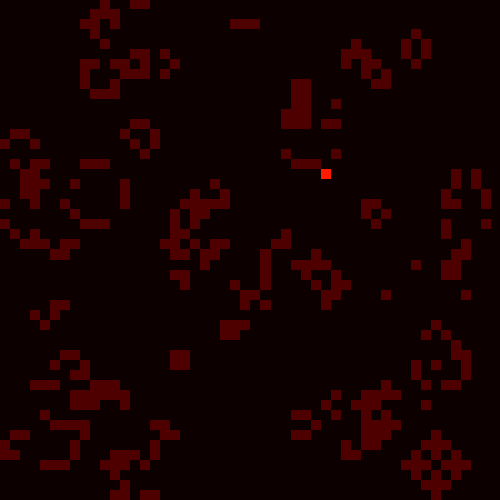
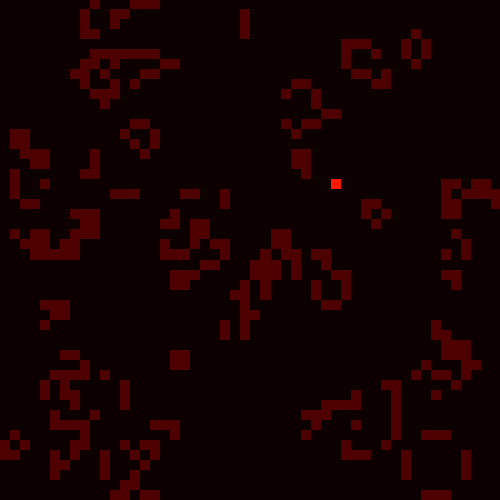
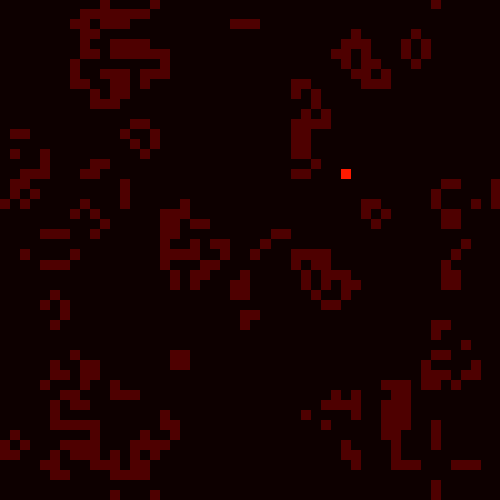
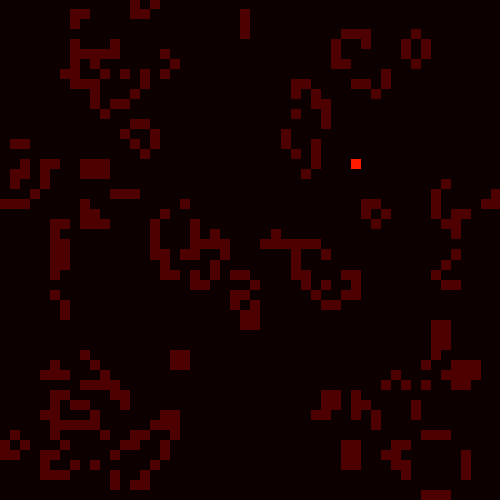
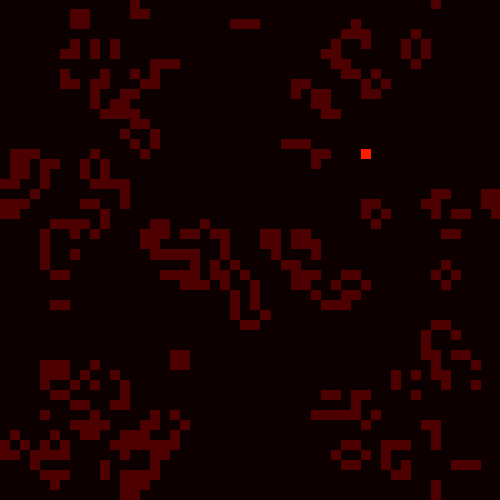
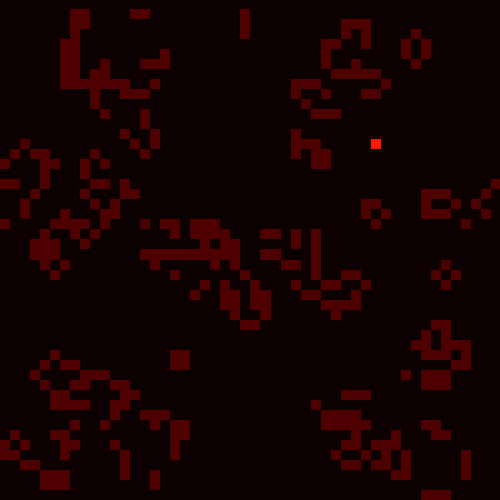
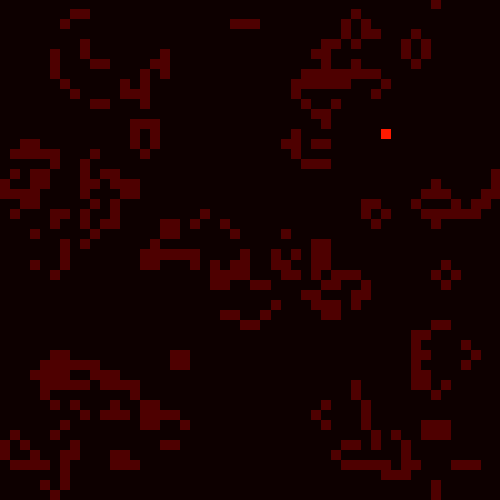
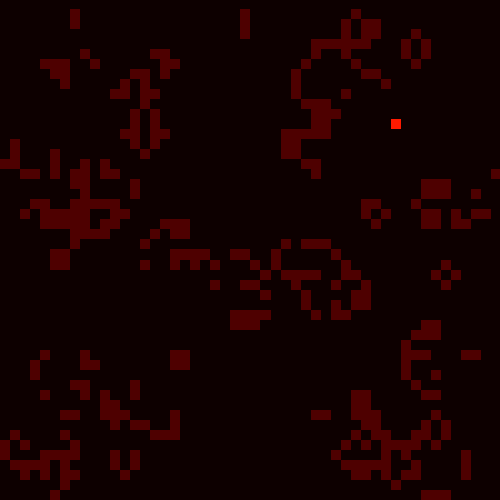
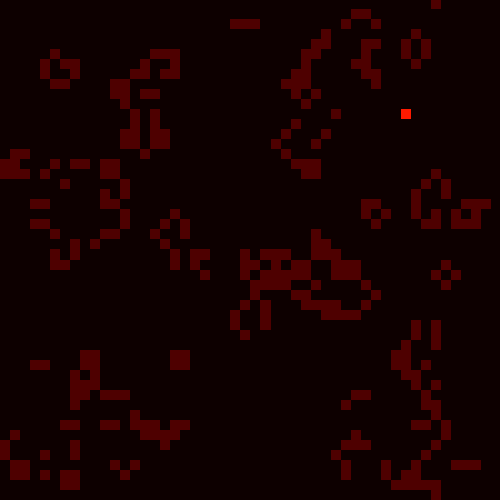
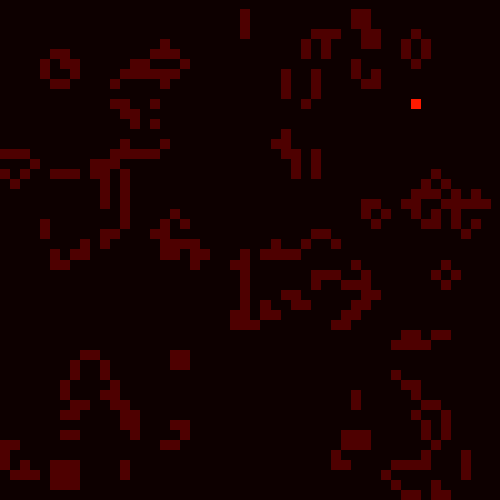
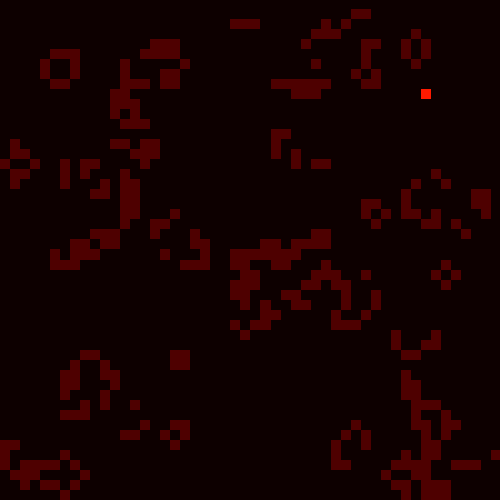
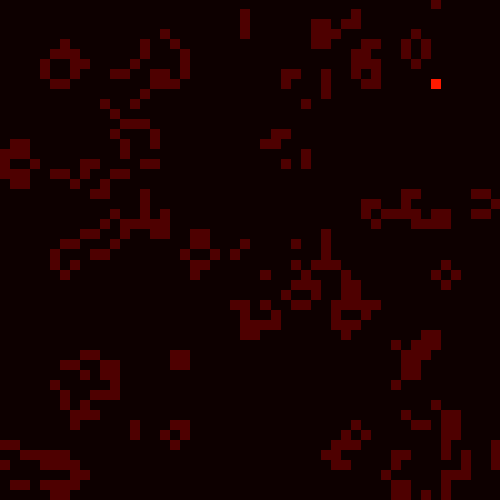
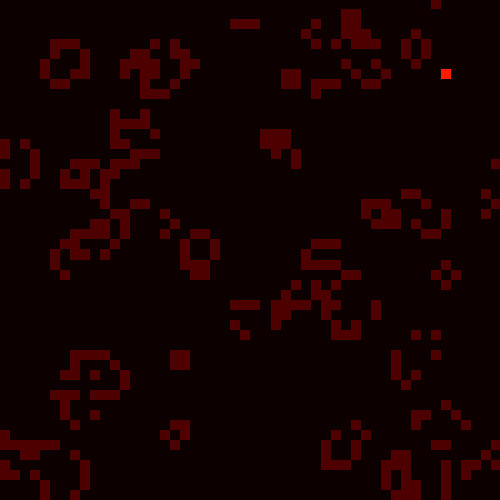
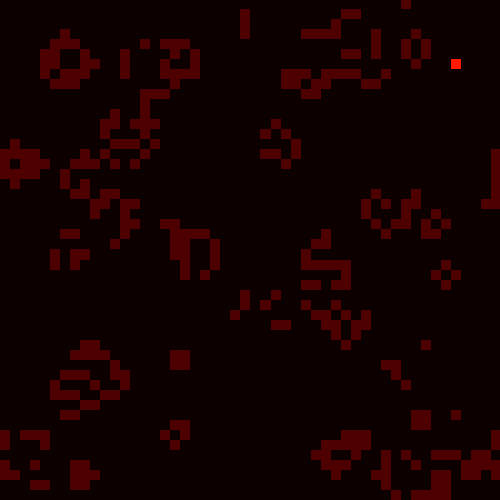
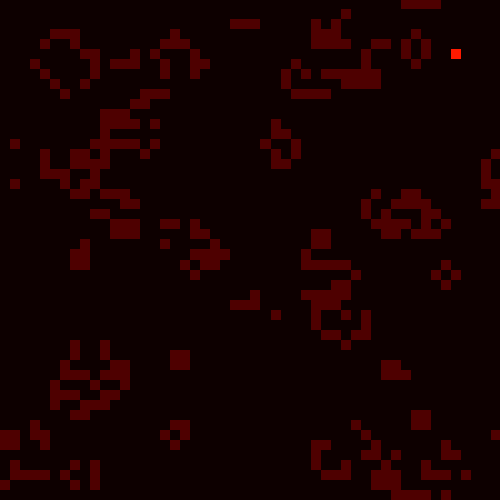
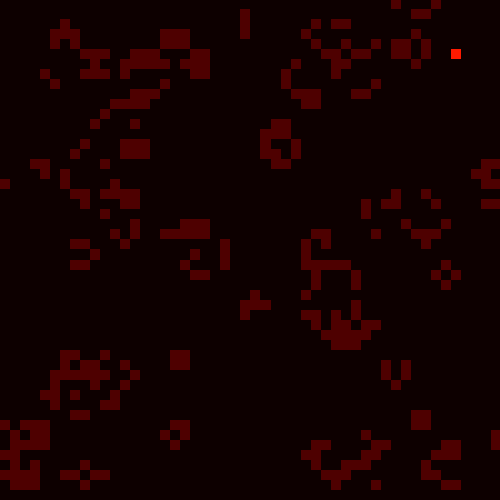
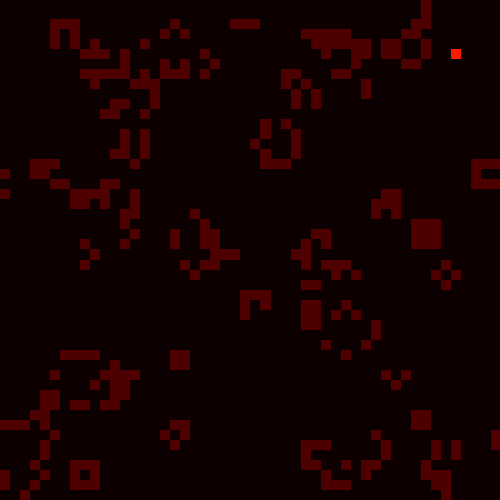
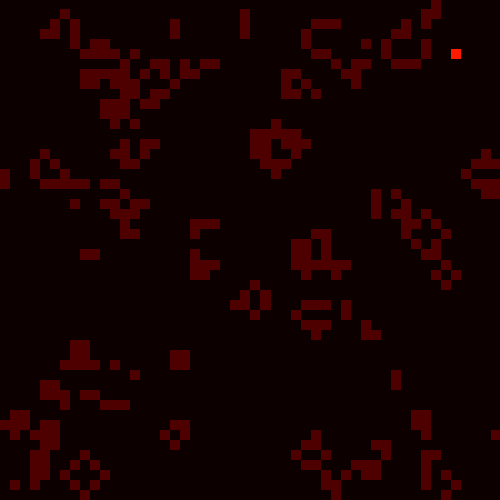
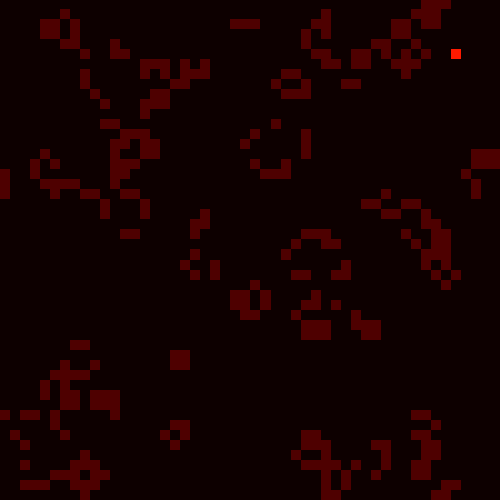
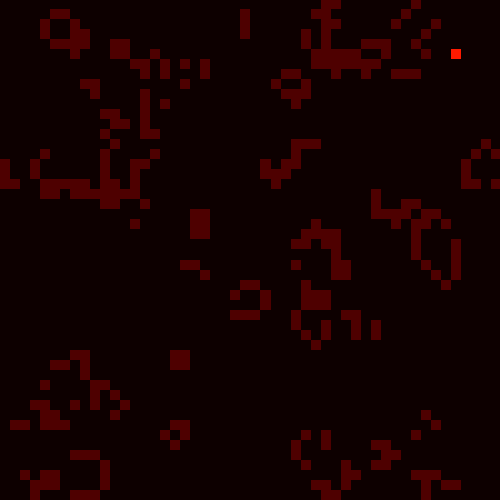
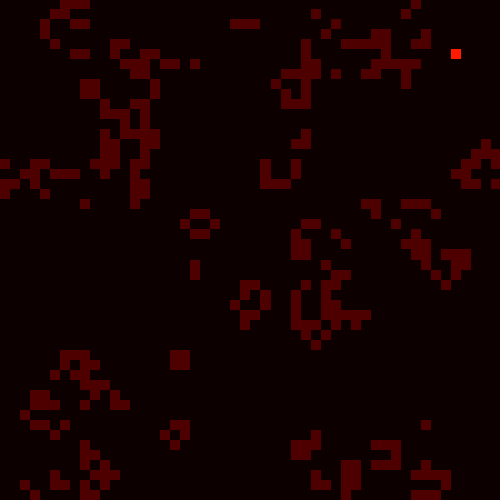
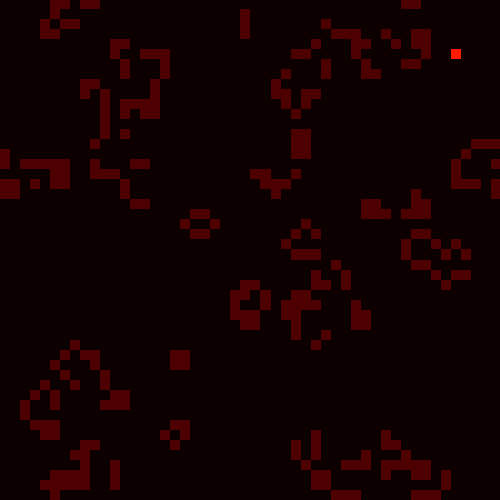
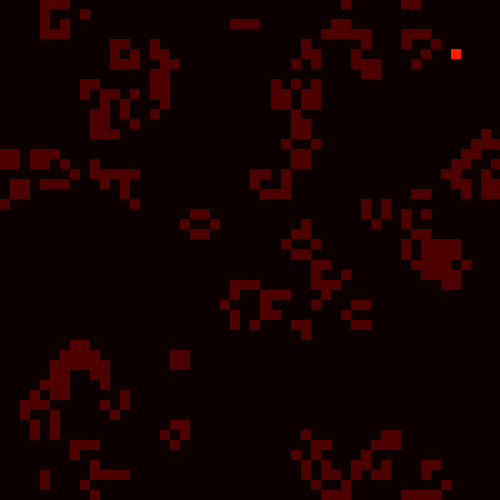
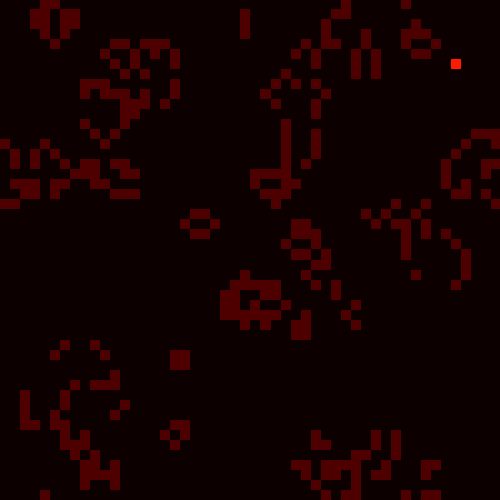
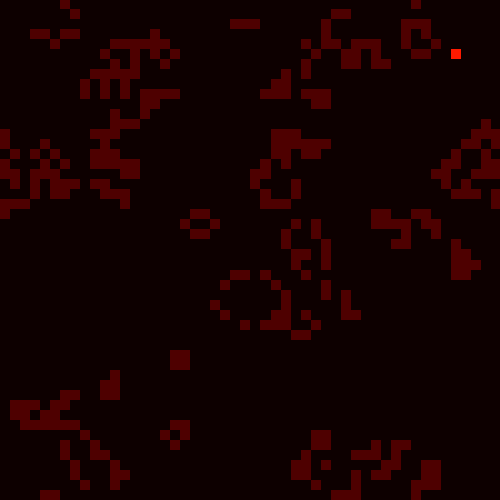
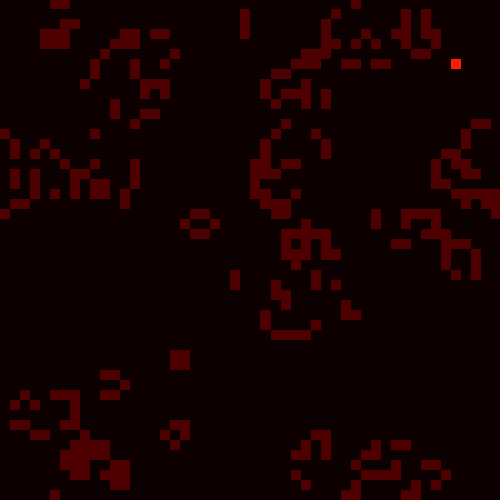
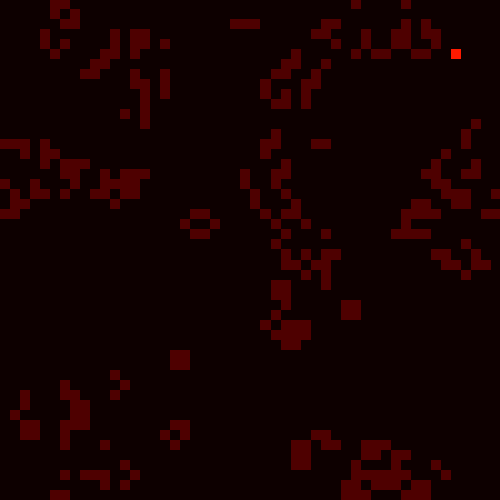
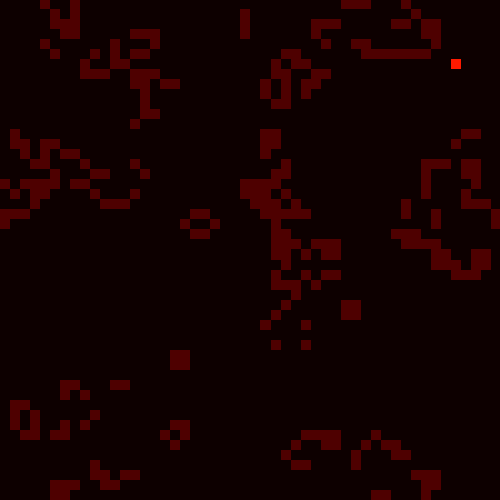
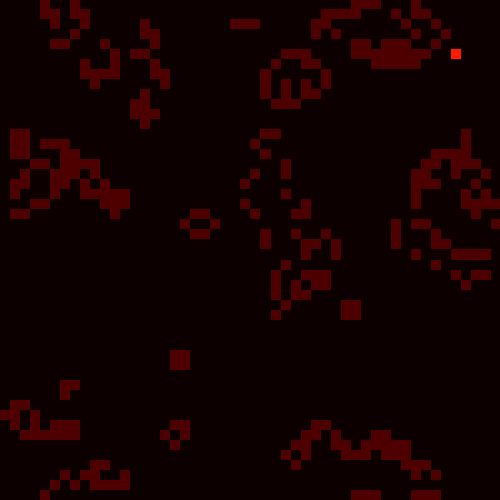
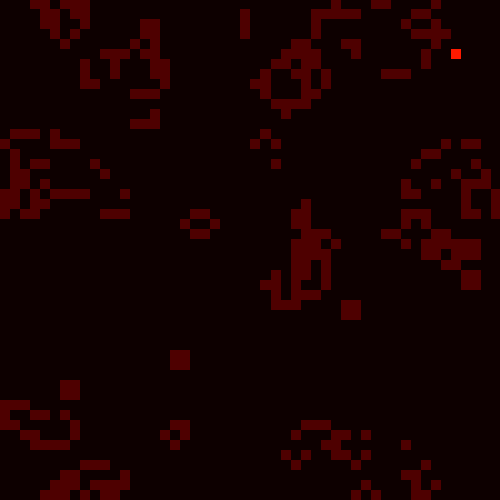
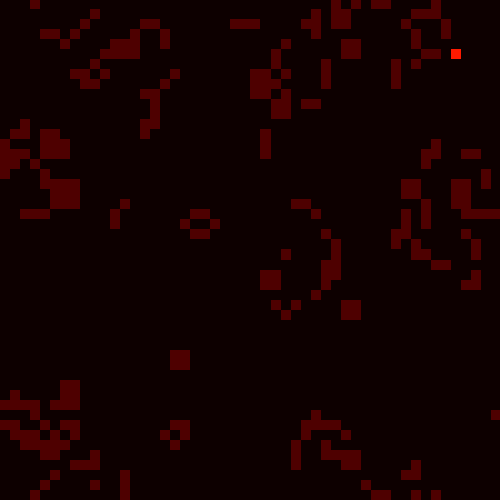
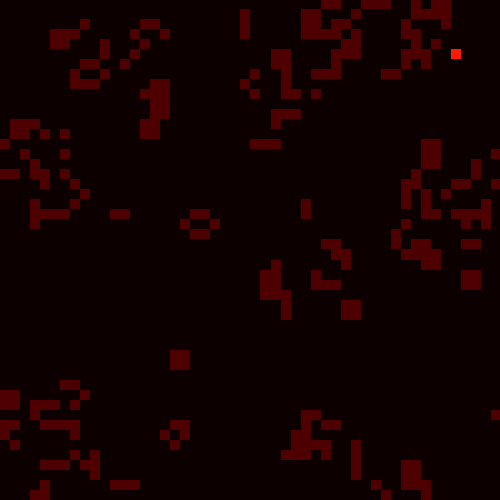
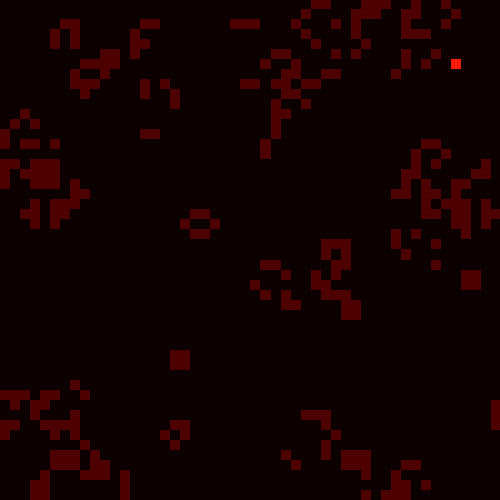
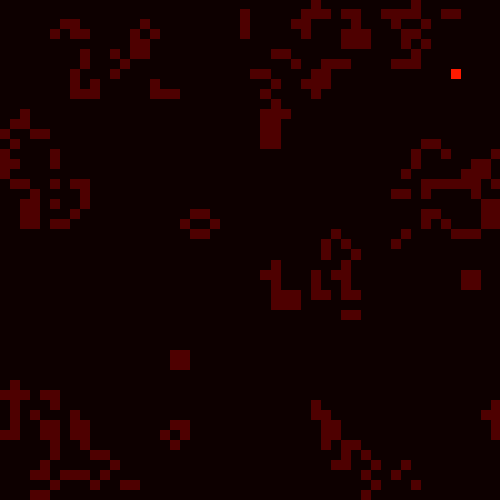
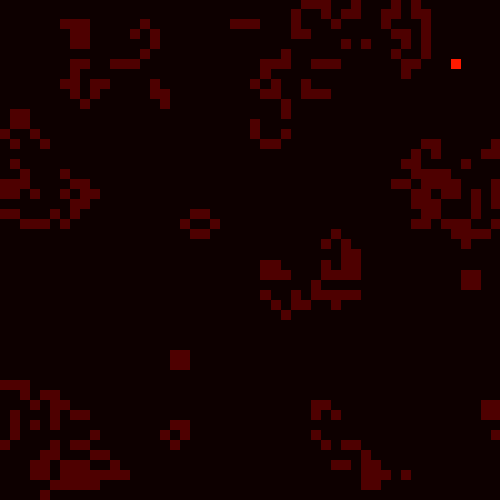
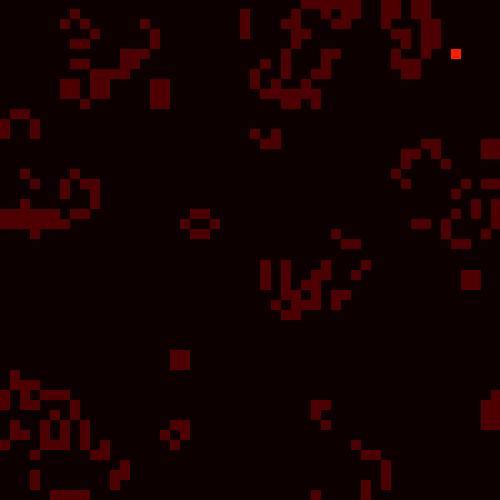
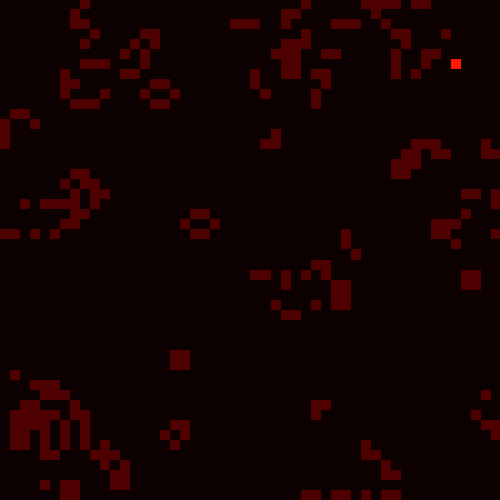
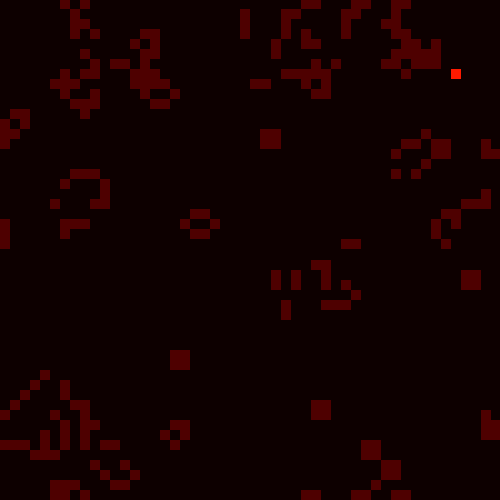
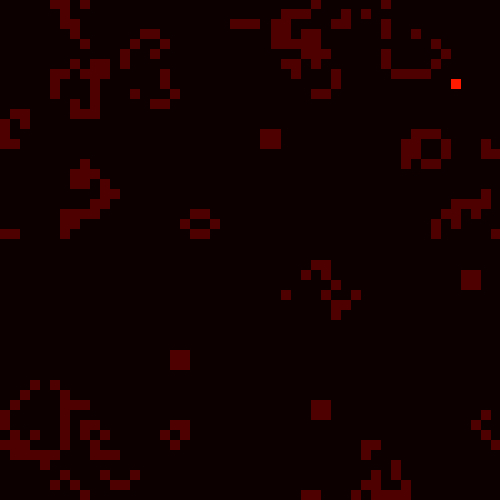
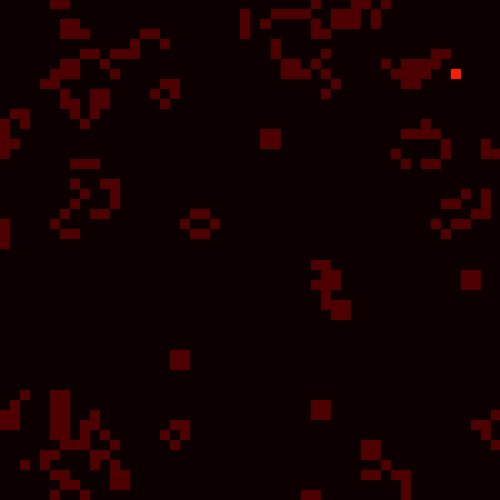
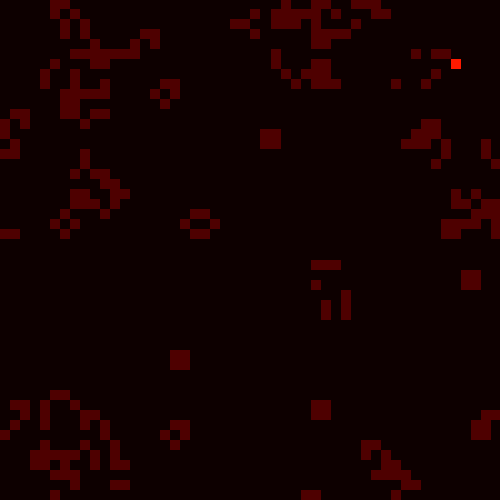
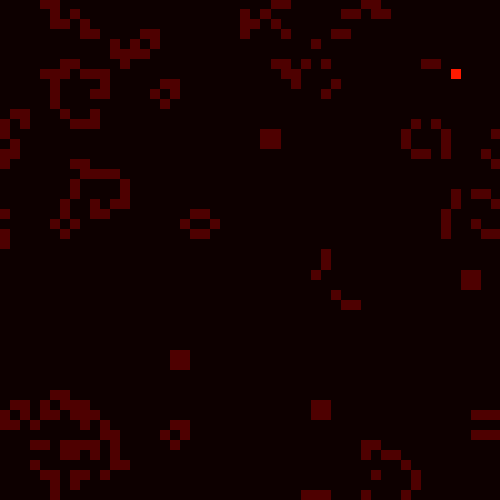
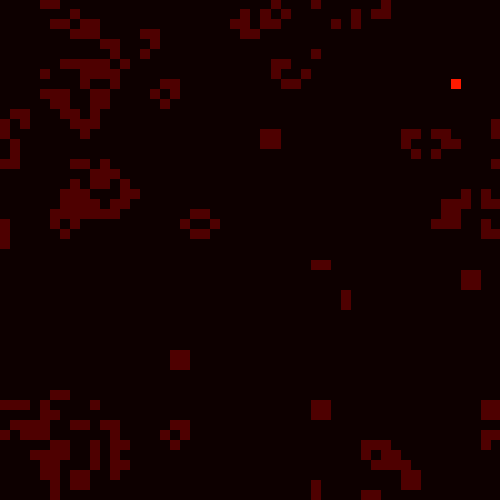
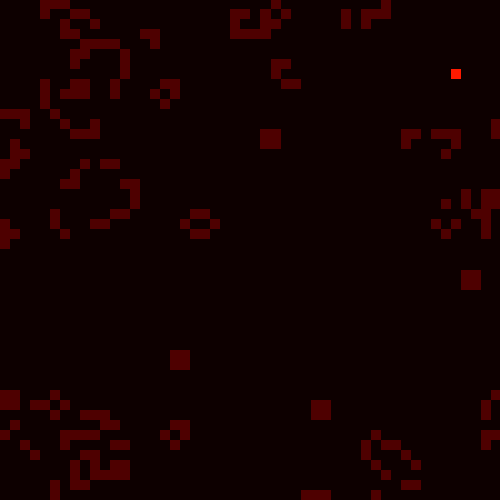
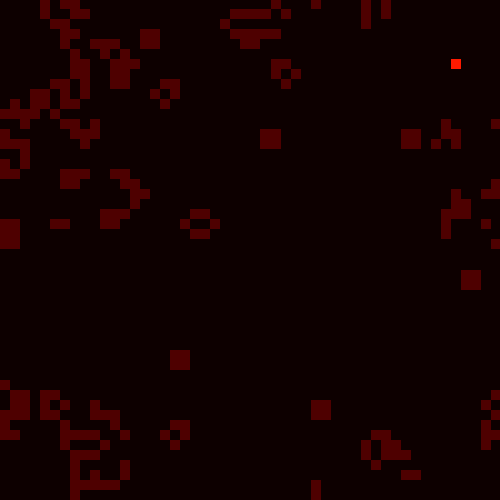
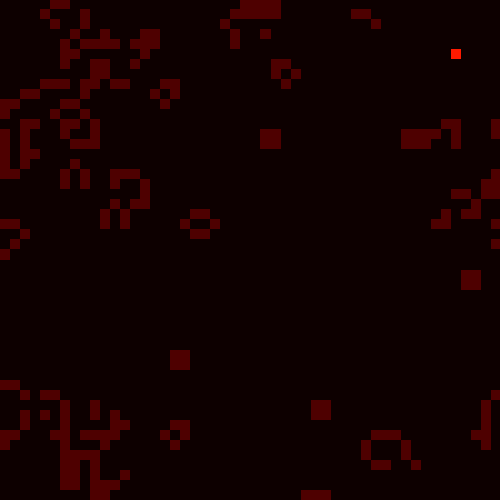
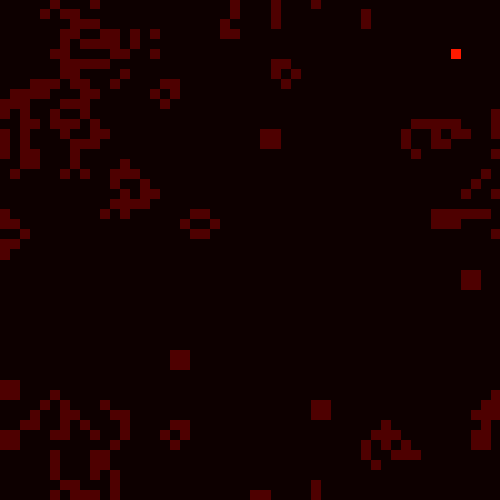
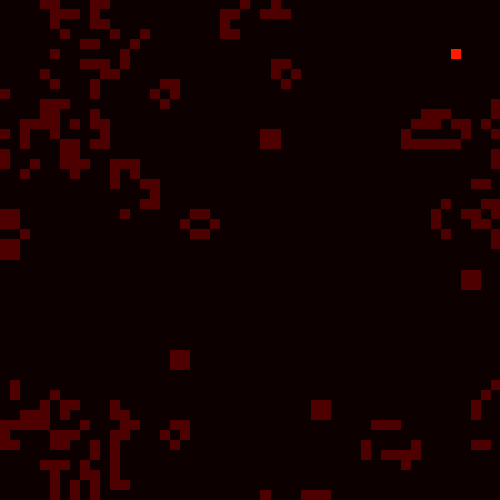
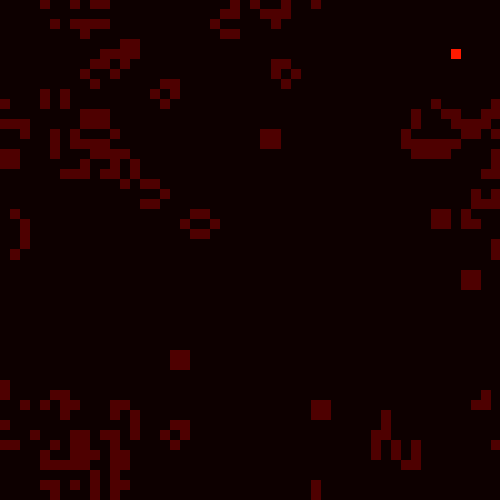
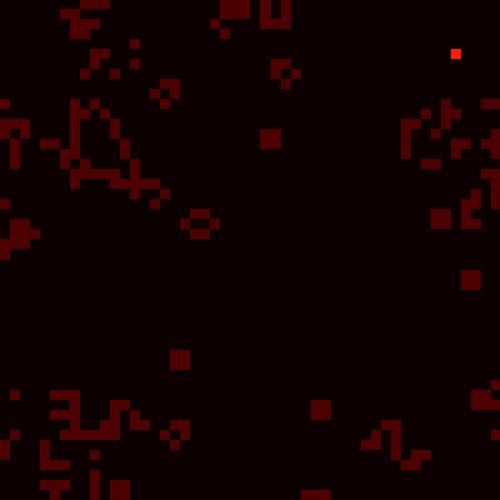
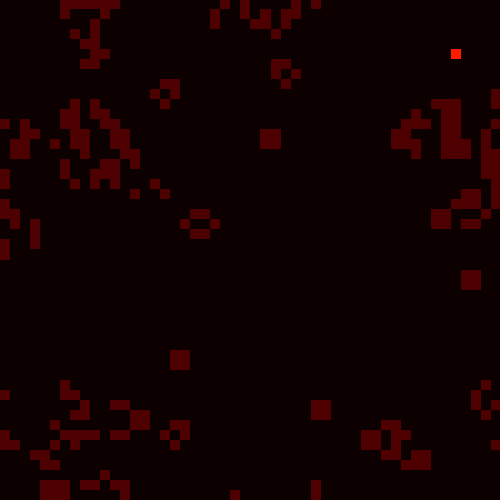
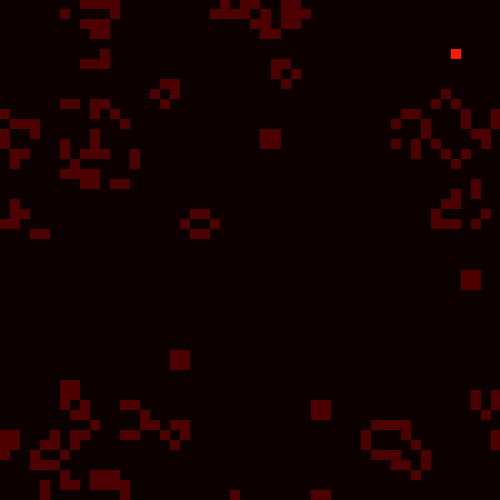
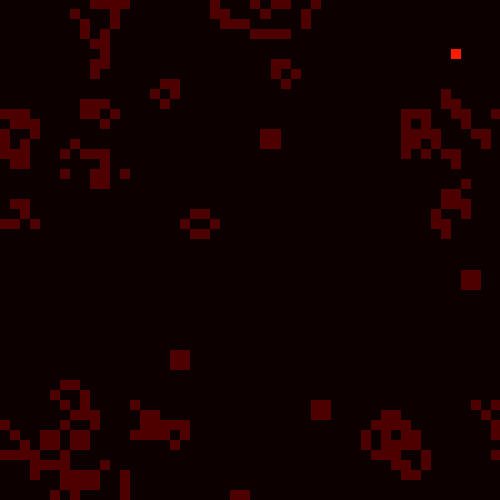
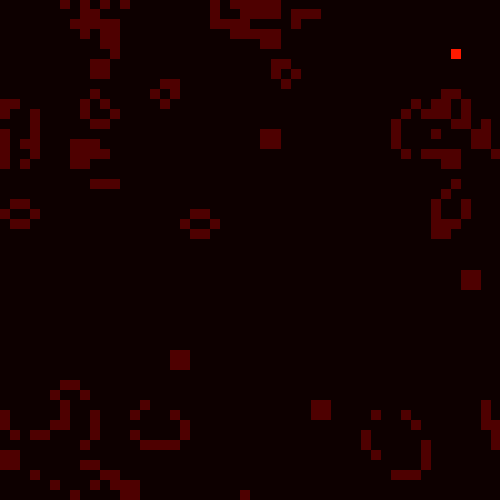
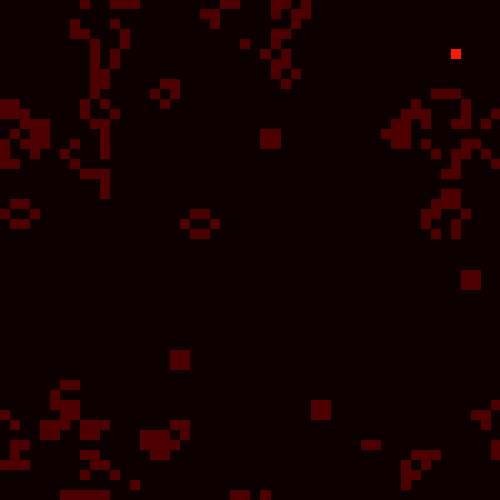
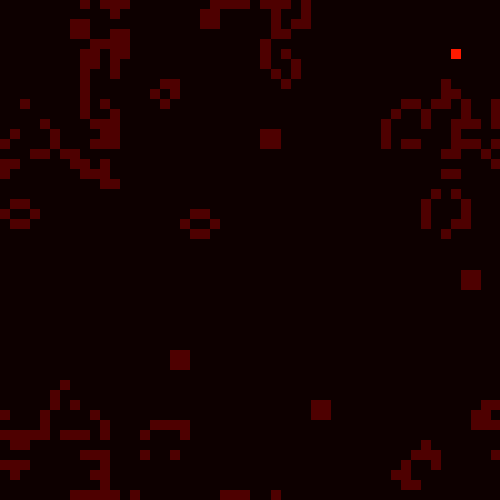
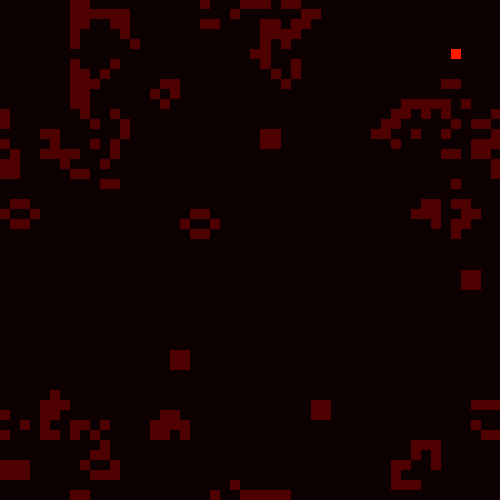
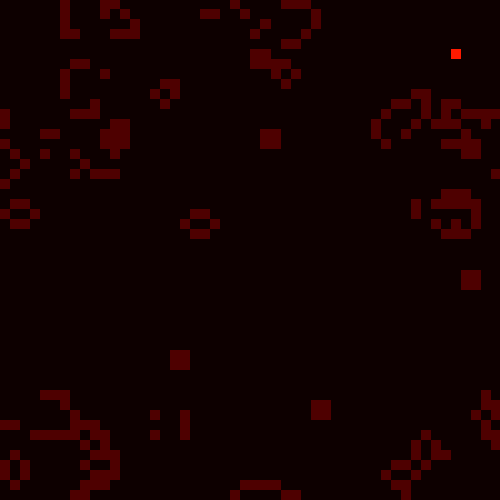
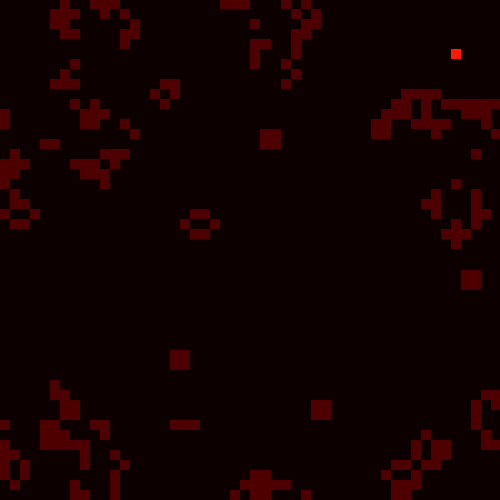
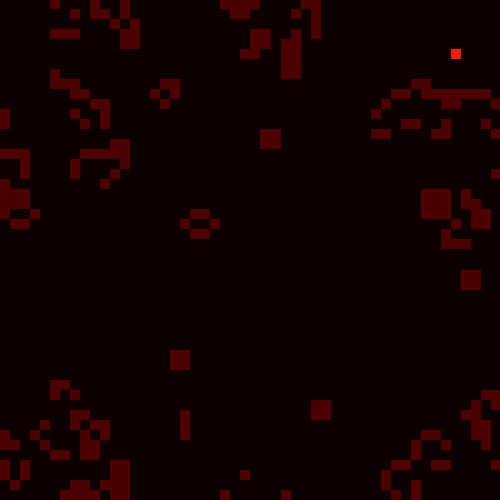
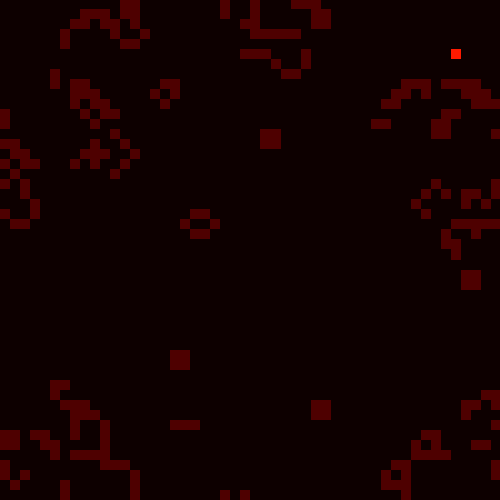
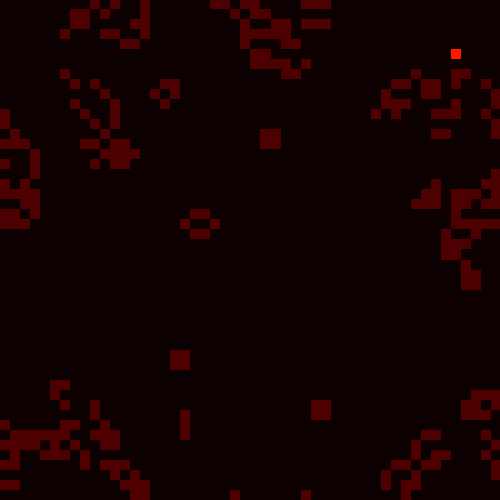
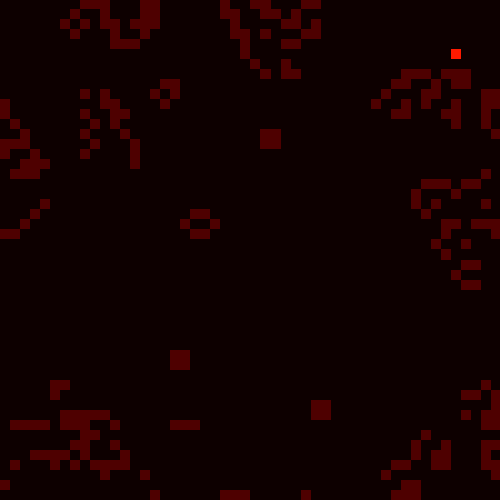
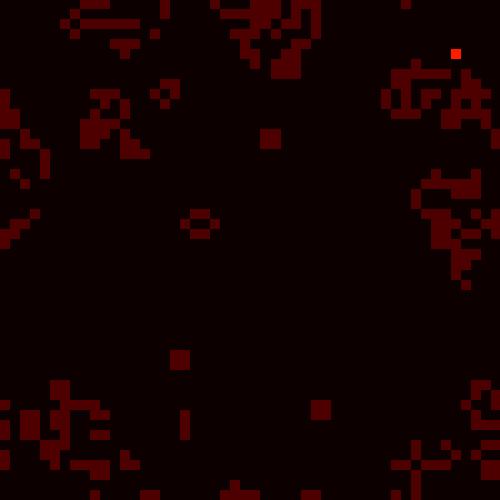
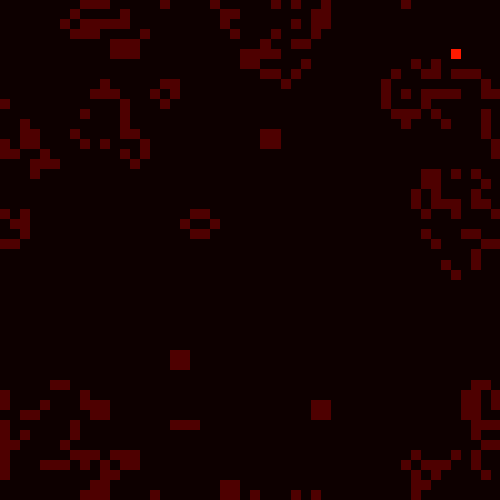
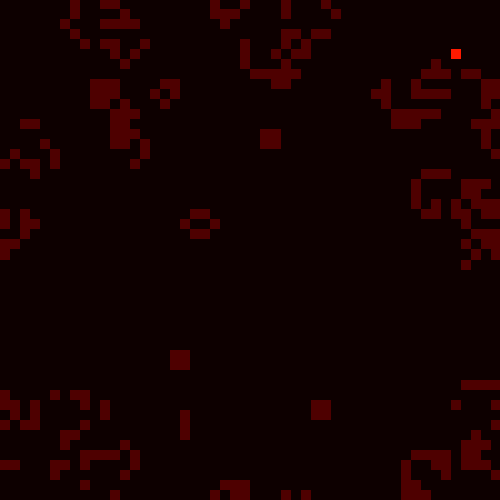
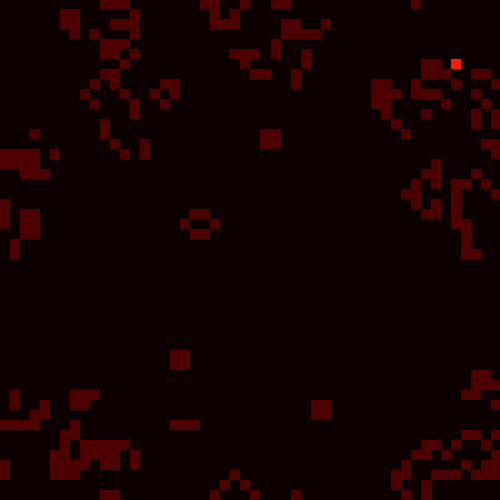
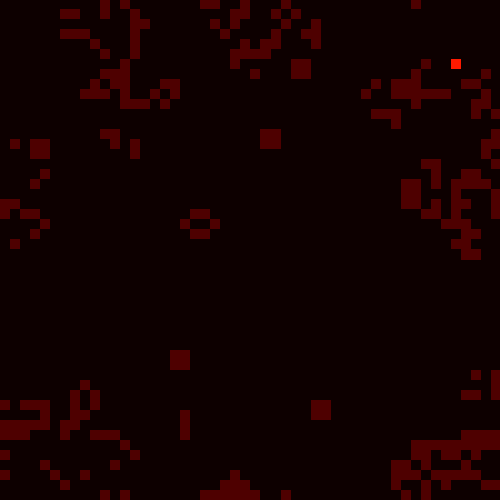
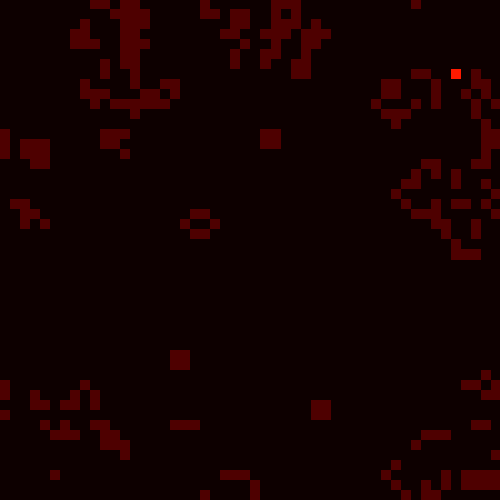
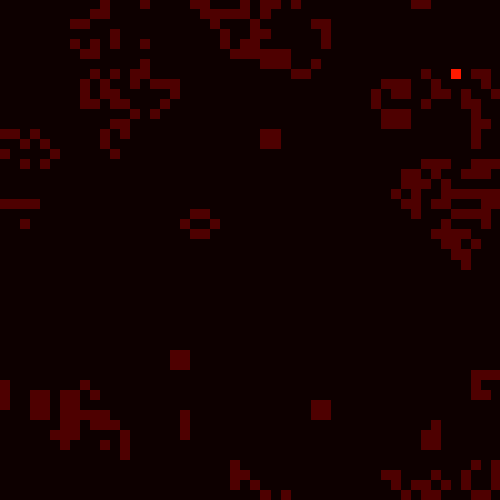
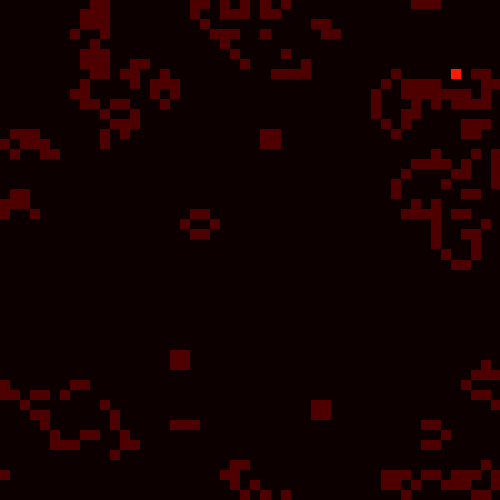
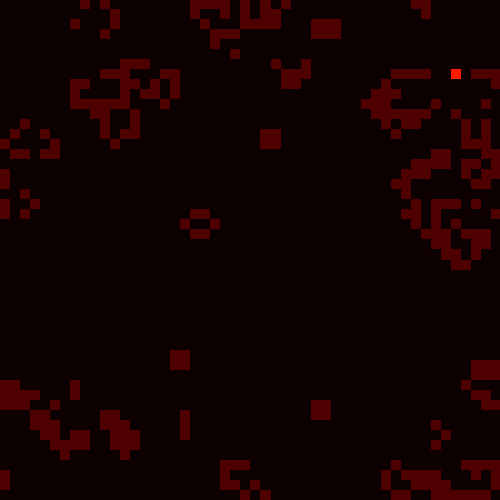
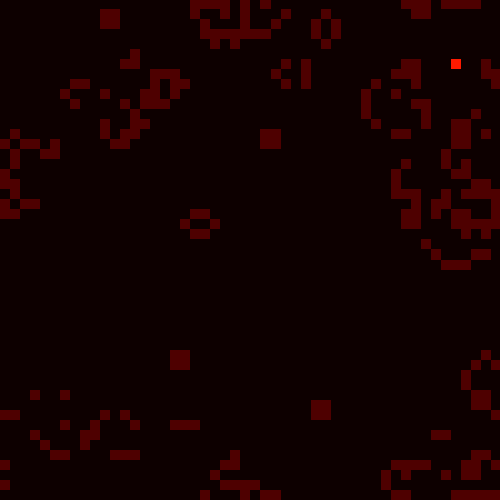
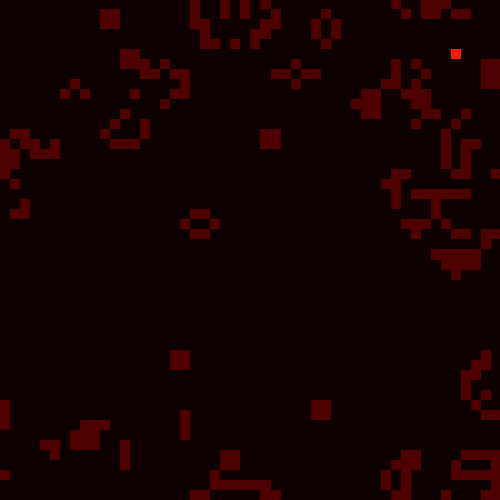
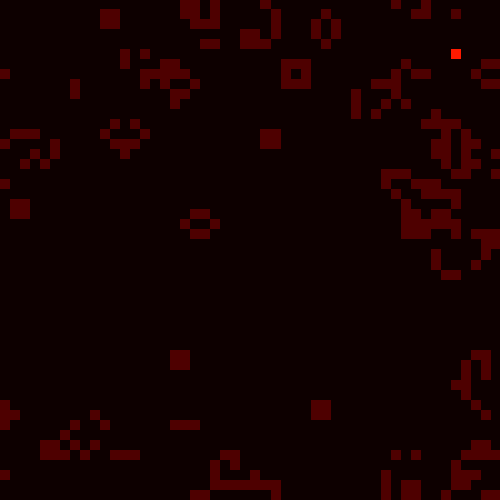
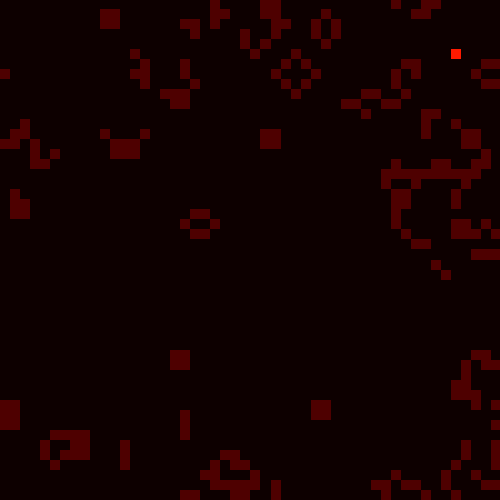
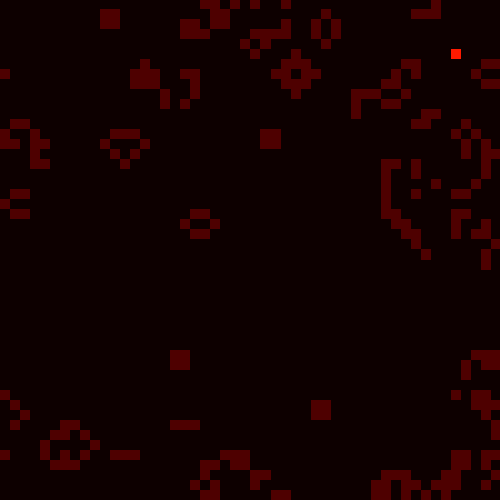
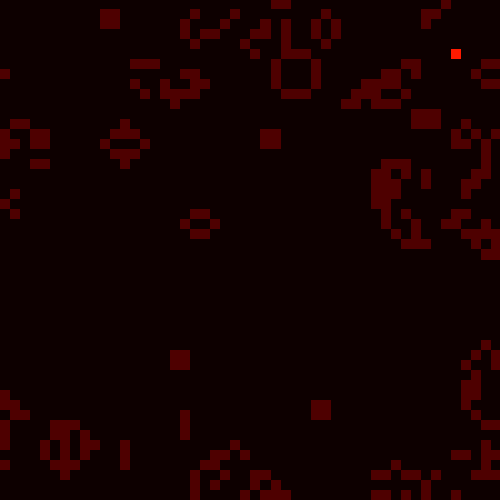
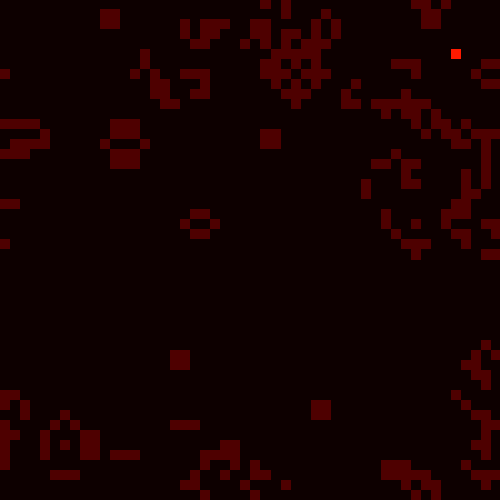
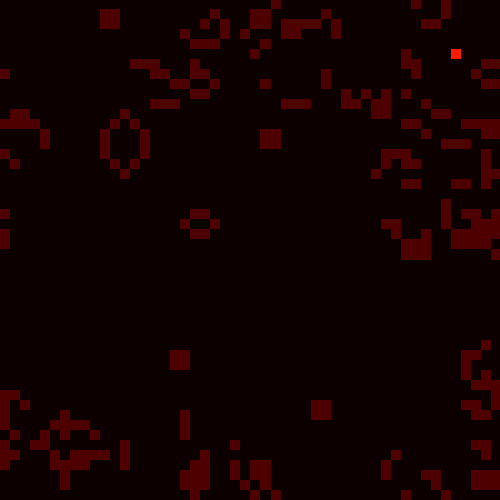
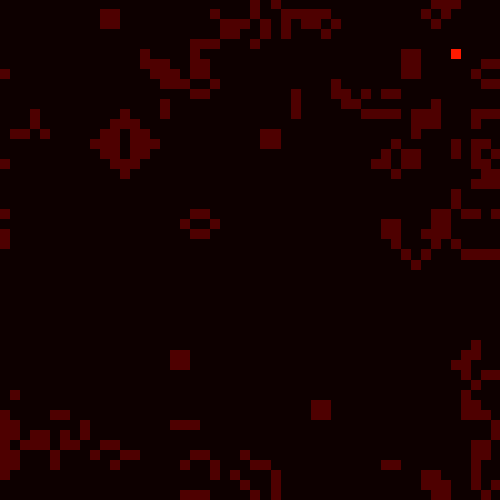
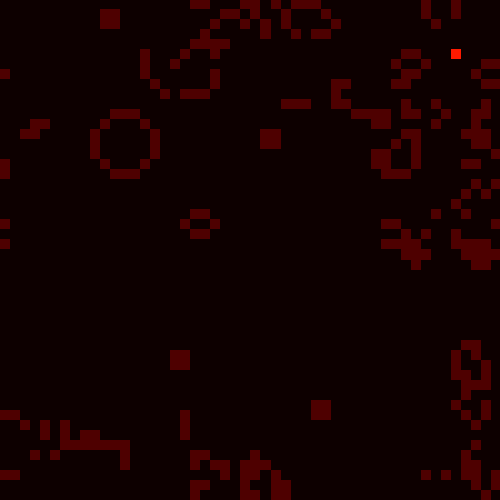
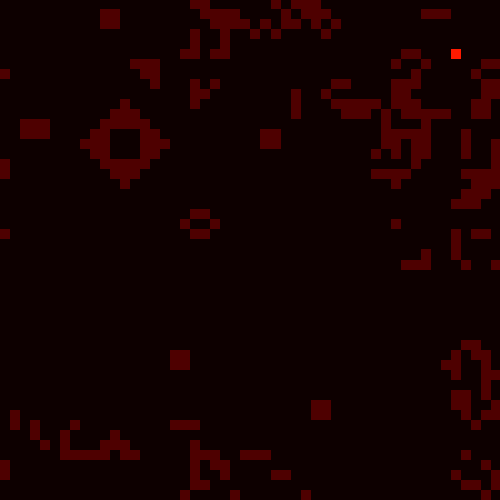

In [5]:
coords = (25,25)

def life_animation2(X, dpi=80, frames=10, interval=300, mode='loop'):
    
    global coords
    global train_in
    global train_out
    global final_weights
            
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(int)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 10. / dpi, X.shape[0] * 10. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap='hot', interpolation='nearest')
    im.set_clim(-0.05, 10)
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)
    
    # animation function.  This is called sequentially
    def animate(i):
        
        global coords
        global train_in
        global train_out
        global disc_weights
        
        if(animate.X[coords[0],coords[1]] == 0):
            animate.X[coords[0],coords[1]] = 4
        if(animate.X[coords[0],coords[1]] == 1):
            animate.X[coords[0],coords[1]] = 9
        im.set_data(animate.X)
        
        test_in = animate.X[coords[0]-lookr:coords[0]+lookr+1,coords[1]-lookr:coords[1]+lookr+1].flatten()
        output = sig_func(test_in,final_weights)
    
        d = output.argmin() 
        if(d==0):
            coords = (coords[0]-1,coords[1]+1)
        if(d==1):
            coords = (coords[0],coords[1]+1)
        if(d==2):
            coords = (coords[0]+1,coords[1]+1)
        if(d==3):
            coords = (coords[0]-1,coords[1])
        if(d==5):
            coords = (coords[0]+1,coords[1])
        if(d==6):
            coords = (coords[0]-1,coords[1]-1)
        if(d==7):
            coords = (coords[0],coords[1]-1)
        if(d==8):
            coords = (coords[0]+1,coords[1]-1)
        coords = list(np.clip(coords,5,45))
        
        animate.X = life_step(animate.X)
        #print(np.round(disc_weights))
        
        return (im,)
    
    animate.X = X
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval)
    
    return display_animation(anim, default_mode=mode)

life_animation2(np.random.choice([0,0,0,0,1], size=(50,50)), dpi=15, frames=100, interval=50, mode='once')

In [6]:
final_weights

array([[-0.,  2., -0., -0.,  1., -0., -0.,  0., -0.],
       [-0., -0.,  1.,  1., -0.,  0., -0., -1., -0.],
       [-0.,  1.,  0., -0.,  2.,  0., -0., -0.,  0.],
       [-0.,  0.,  1.,  1., -1., -0.,  1.,  1., -1.],
       [-1.,  1., -1., -0., -1., -0.,  0.,  0., -0.],
       [ 0., -0., -1.,  1., -0., -0., -0.,  1., -1.],
       [-0., -0., -1.,  0.,  2.,  0., -1., -0.,  0.],
       [ 1.,  0., -0.,  1.,  1.,  1.,  1.,  1., -0.],
       [ 1., -1.,  1.,  0., -1., -1.,  1., -0., -1.],
       [ 1.,  0.,  0.,  0., -1.,  1., -0., -0., -1.],
       [-1., -1.,  1.,  0., -1.,  1.,  1., -0., -0.],
       [ 1.,  0., -1.,  1.,  2.,  1.,  1.,  1., -1.],
       [-2., -2., -2., -2., -1., -2., -2., -2., -1.],
       [ 1., -0., -0., -0., -0., -1., -0., -1., -1.],
       [-1.,  0., -0., -1., -1.,  0., -0., -0.,  1.],
       [ 1., -0., -0.,  1.,  1.,  1., -1., -1., -0.],
       [ 0., -1.,  1.,  0., -1.,  0.,  1., -1., -1.],
       [ 1.,  0.,  0.,  1.,  1.,  0.,  1., -0.,  0.],
       [ 1., -1.,  1., -0., 